In [ ]:
!rm -rf pythia_tools

In [15]:
!git clone https://github.com/kmrasmussen/pythia_tools.git pythia_tools
!pip install -e pythia_tools --quiet
!pip install git+https://github.com/neelnanda-io/TransformerLens.git --quiet

fatal: destination path 'pythia_tools' already exists and is not an empty directory.
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [16]:
import torch
import sys
sys.path.append("pythia_tools")
from pythia_tools.models import get_model, get_tokenizer
import matplotlib.pyplot as plt
from pythia_tools.visualization import hist_and_box
from pythia_tools.models import get_model, yield_models, get_n_layers
from pythia_tools.deembedding import get_mlp_in, get_mlp_out

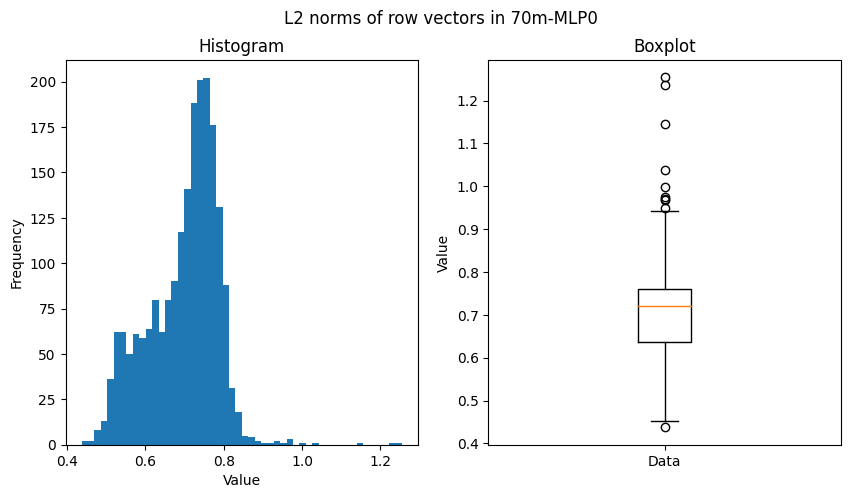

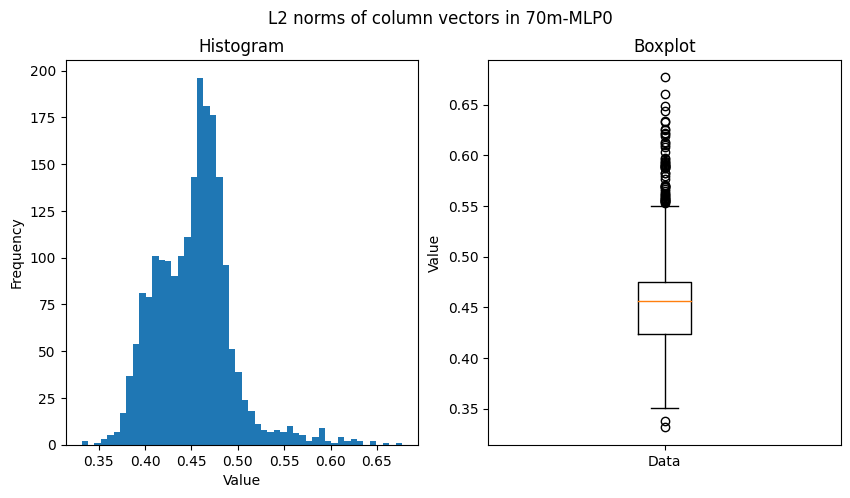

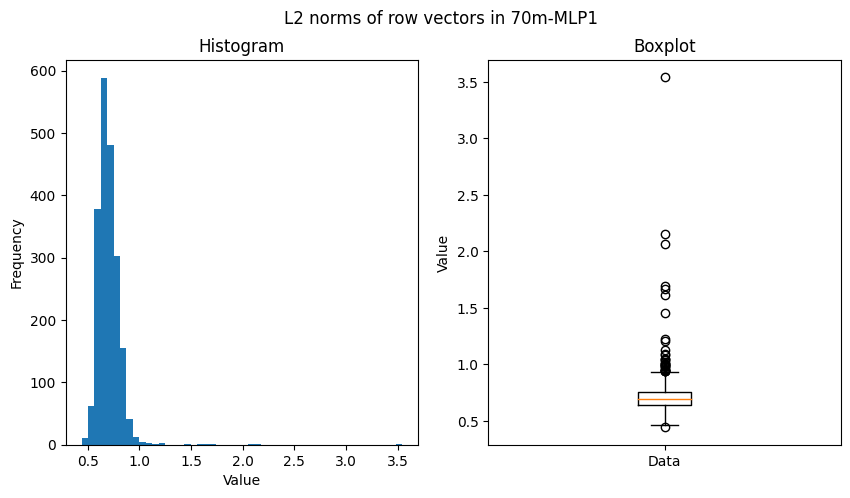

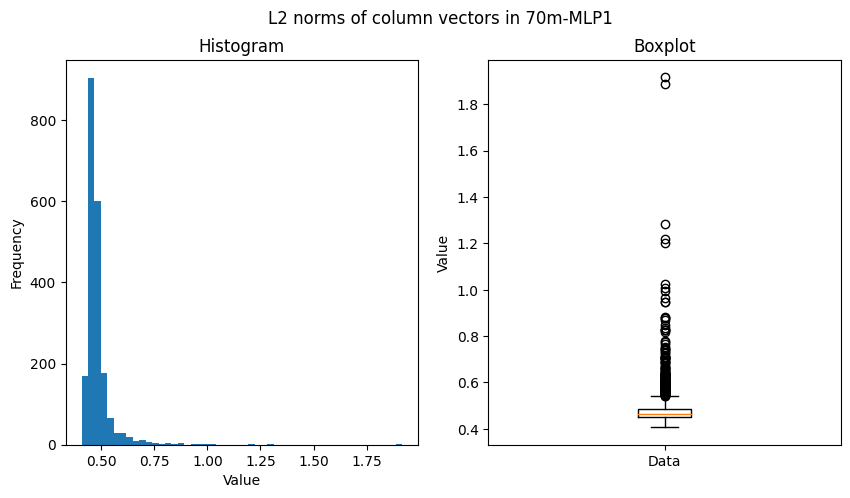

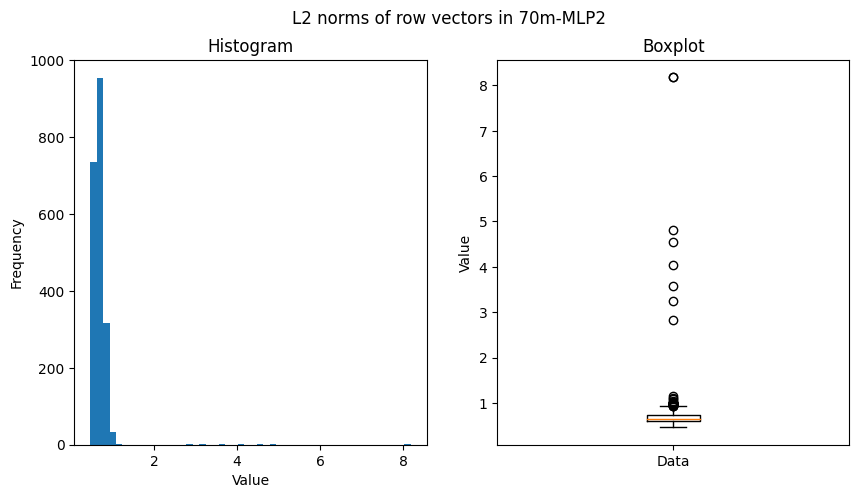

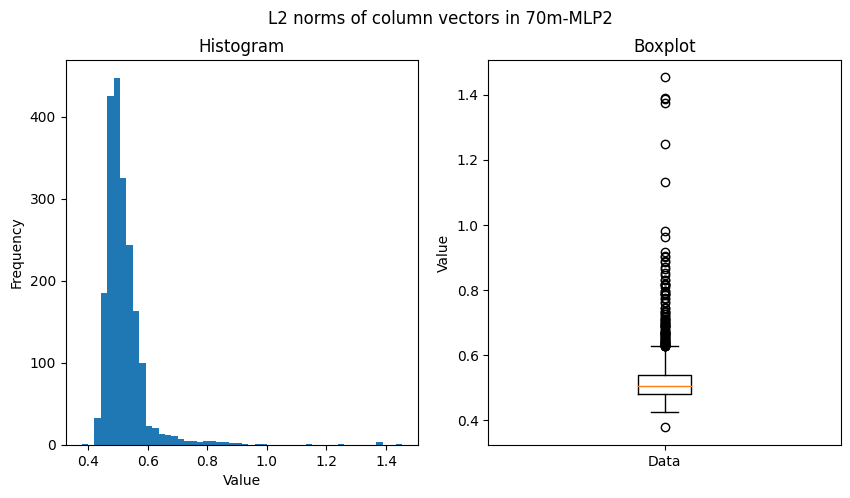

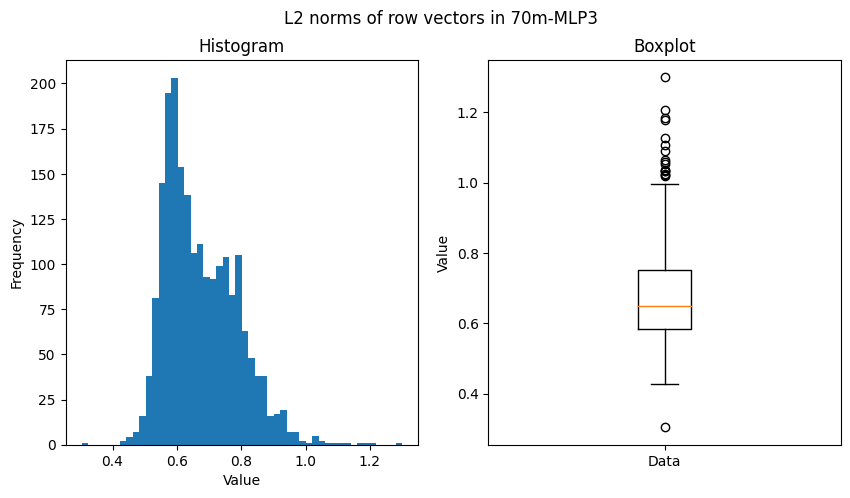

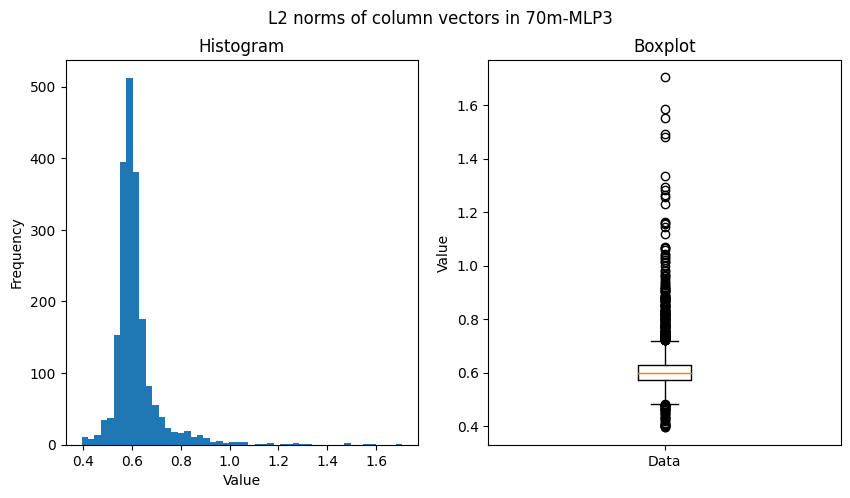

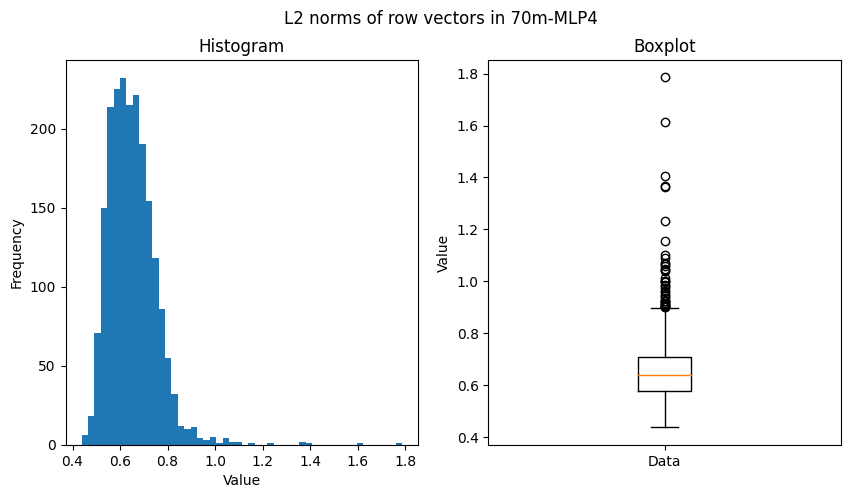

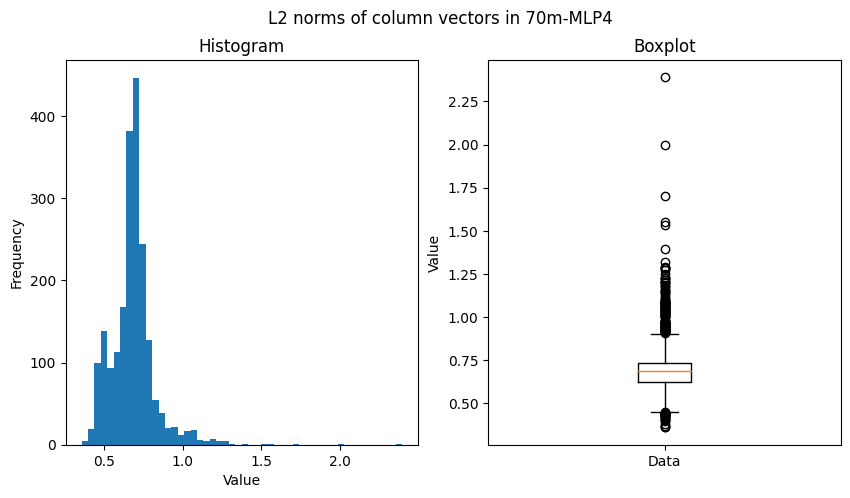

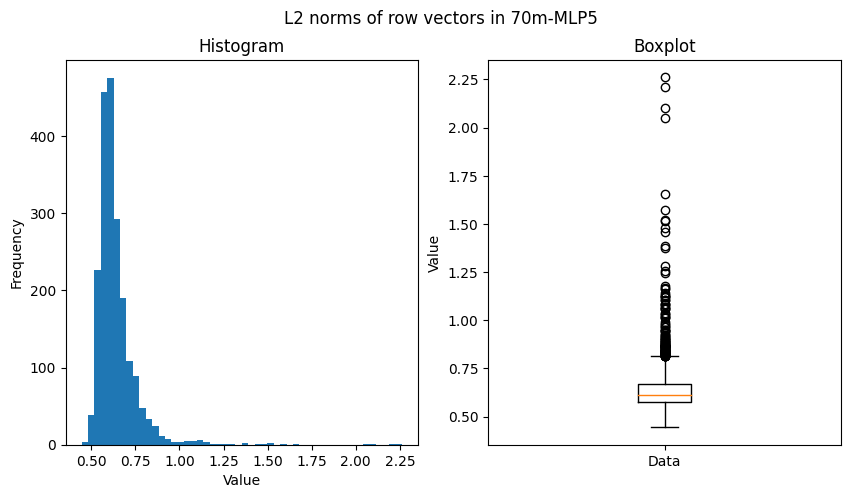

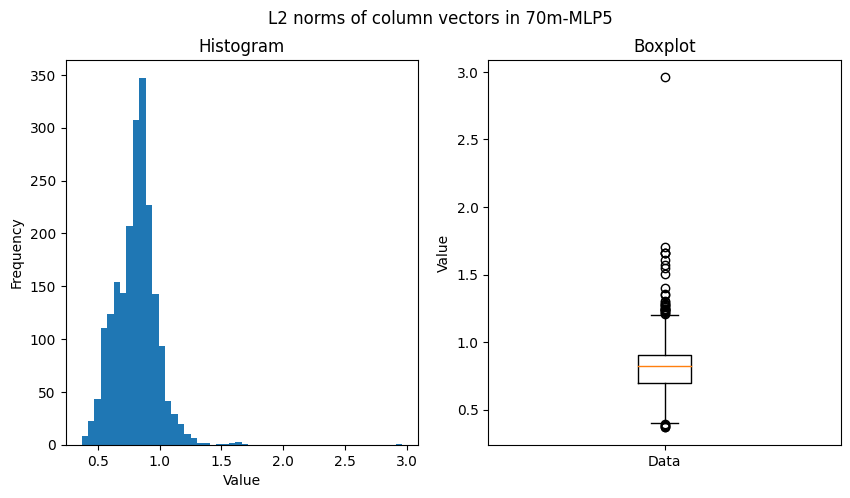

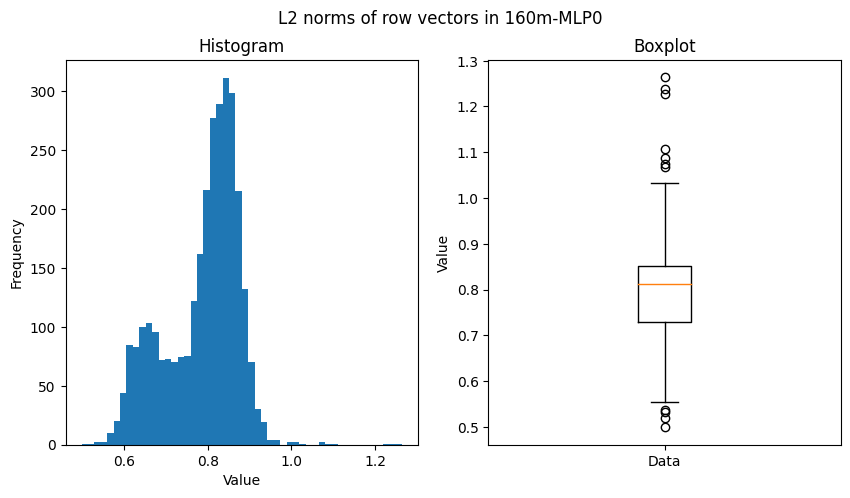

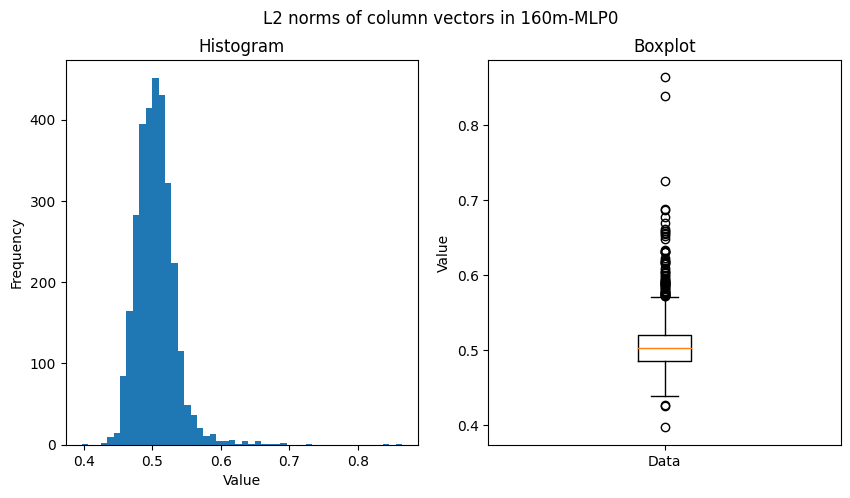

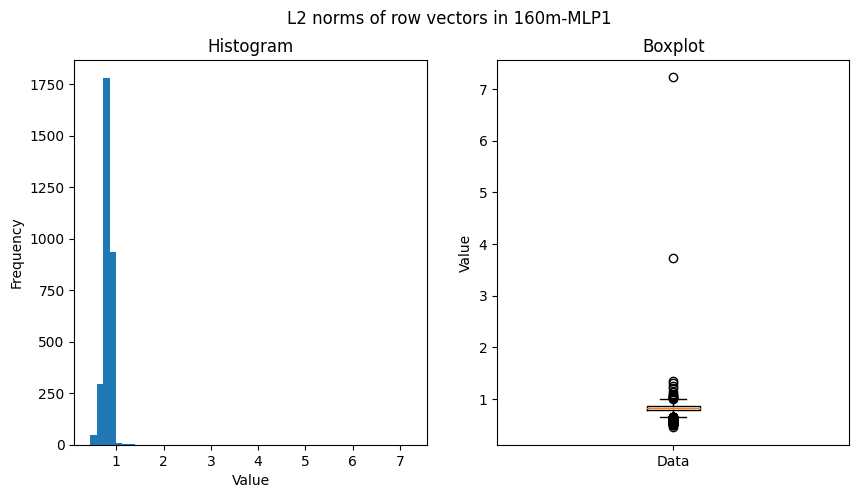

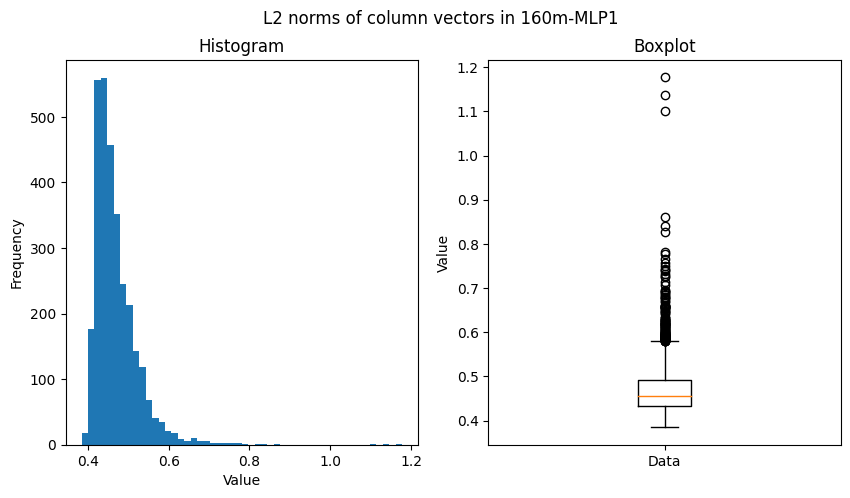

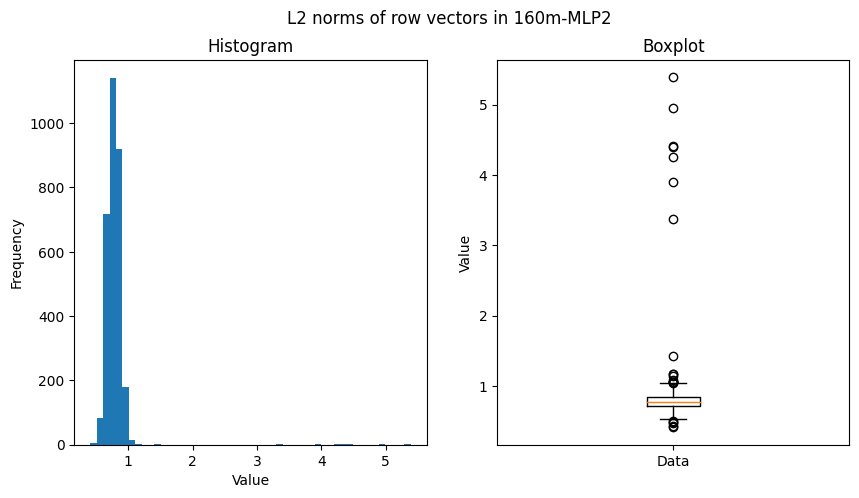

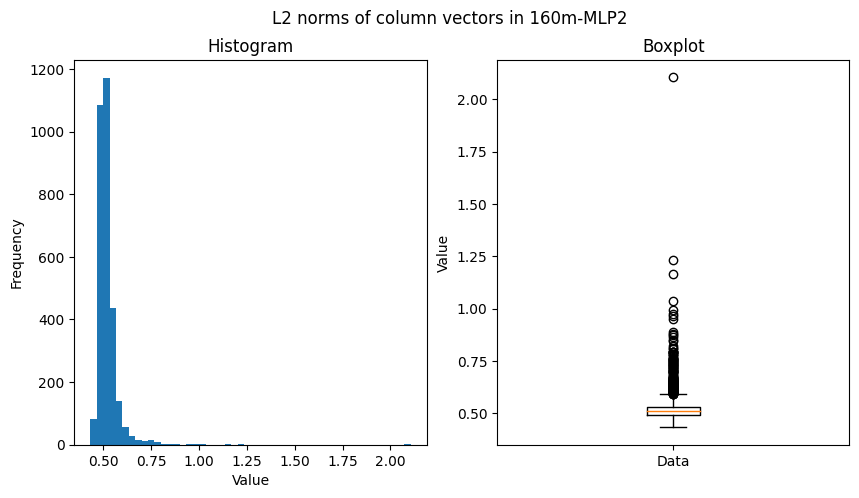

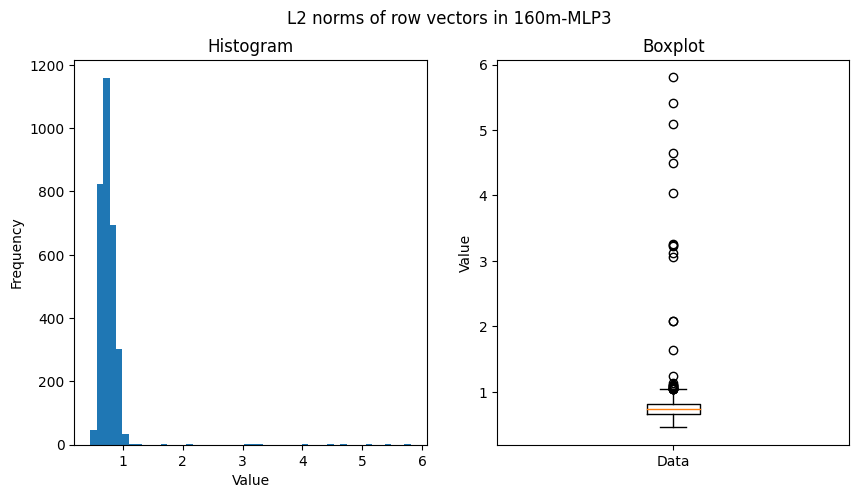

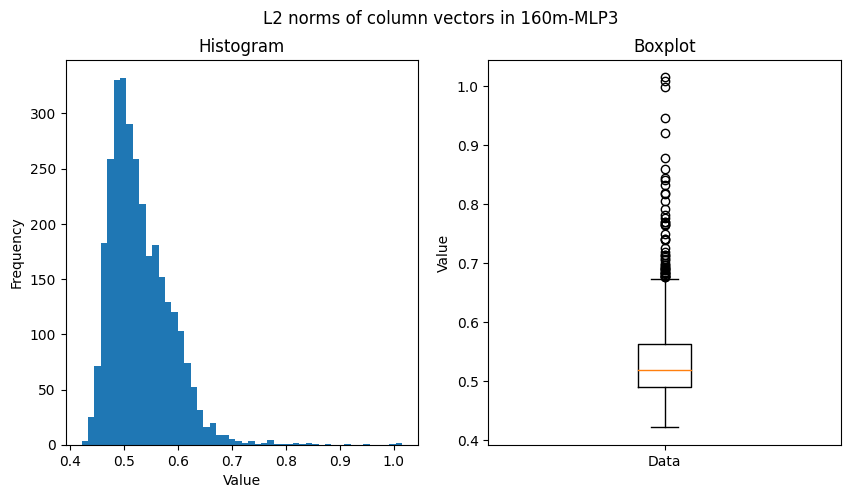

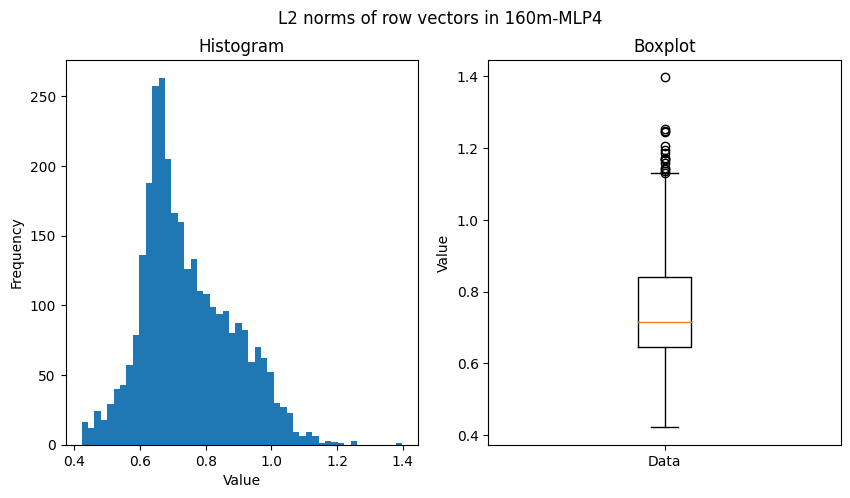

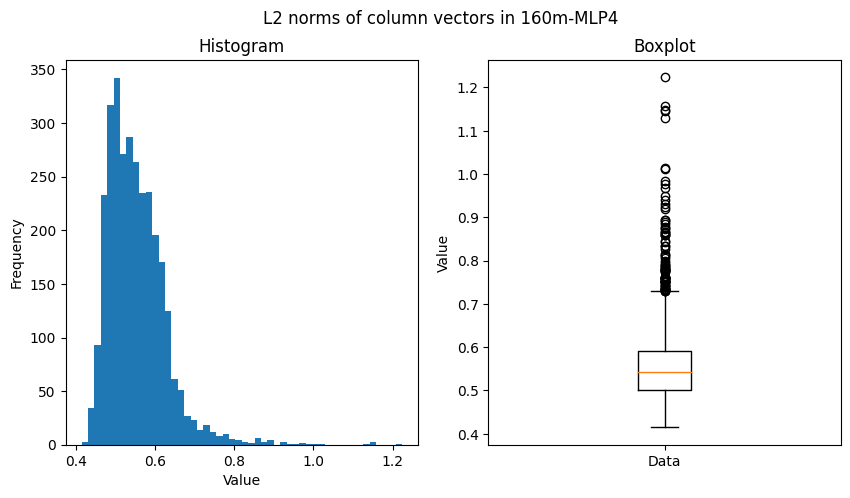

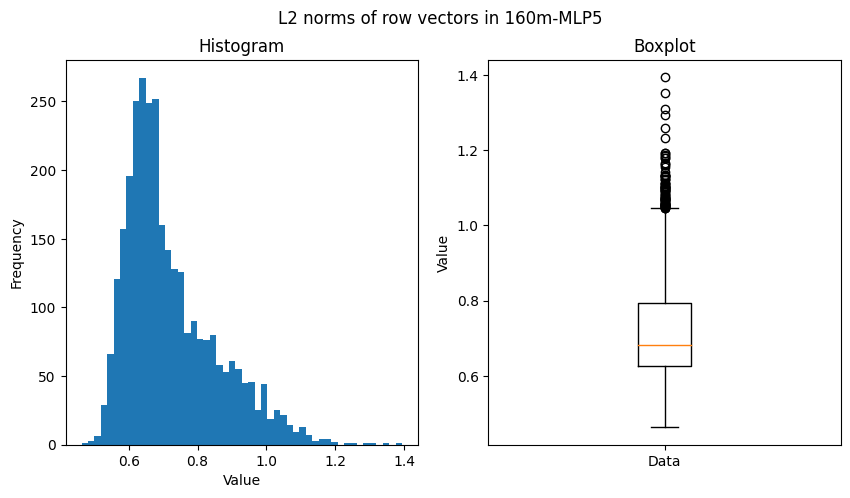

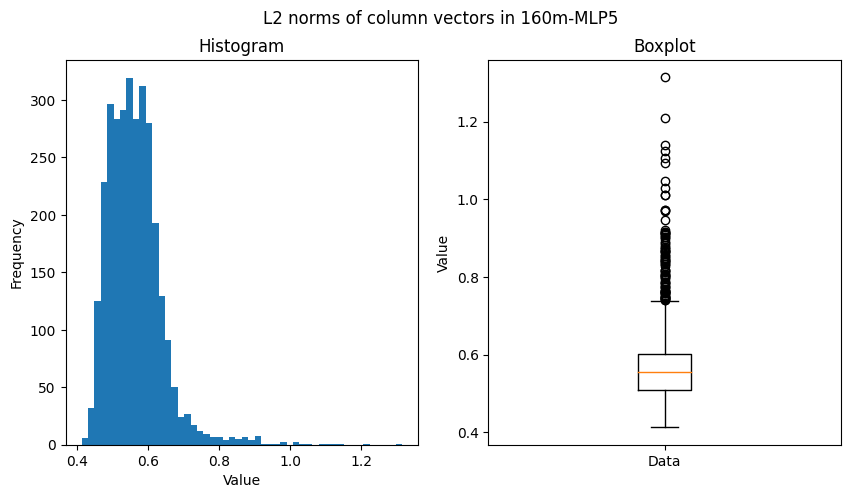

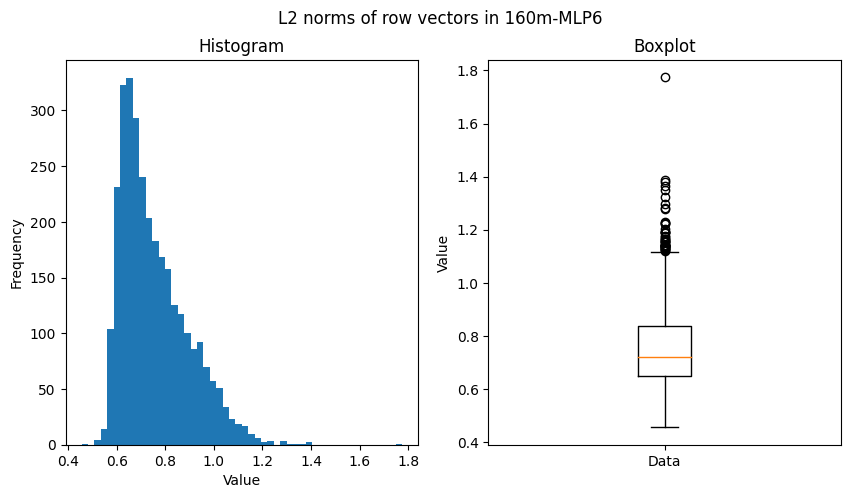

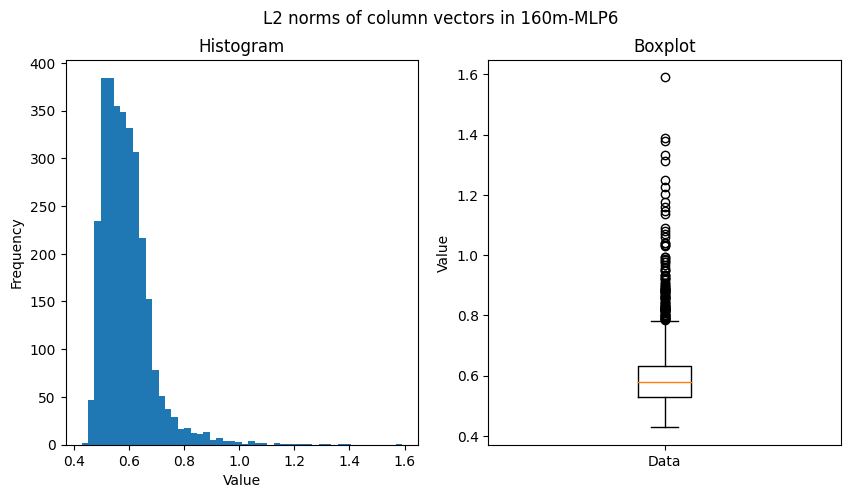

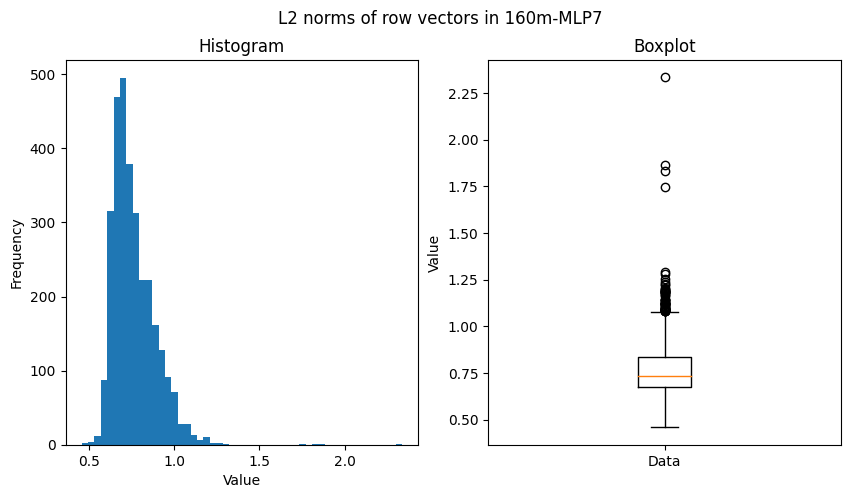

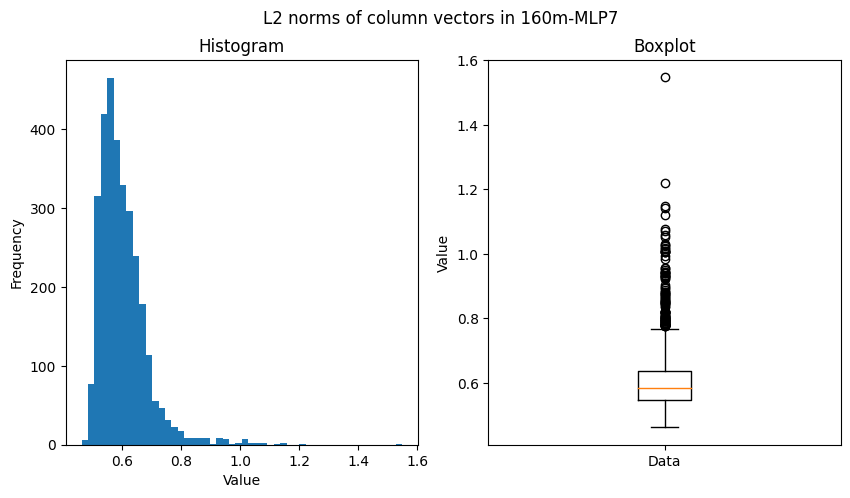

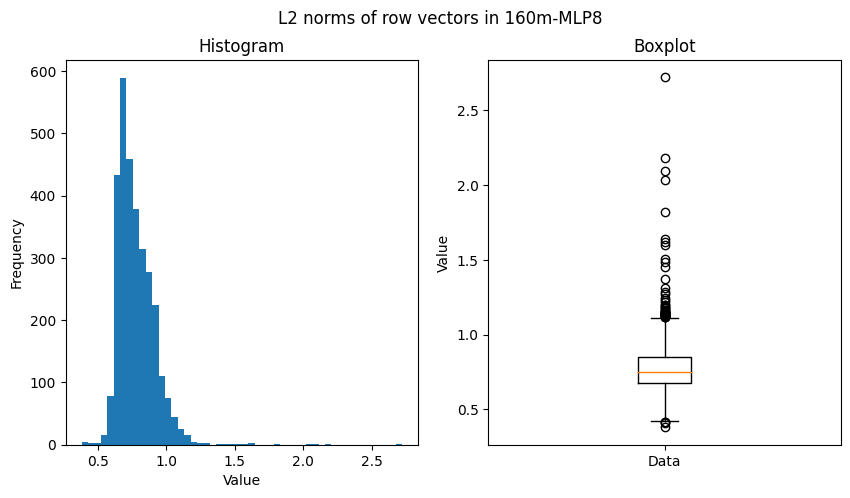

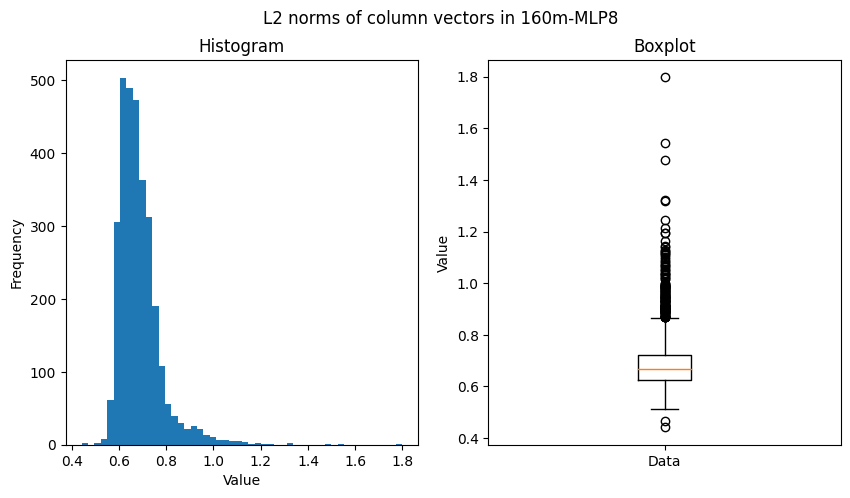

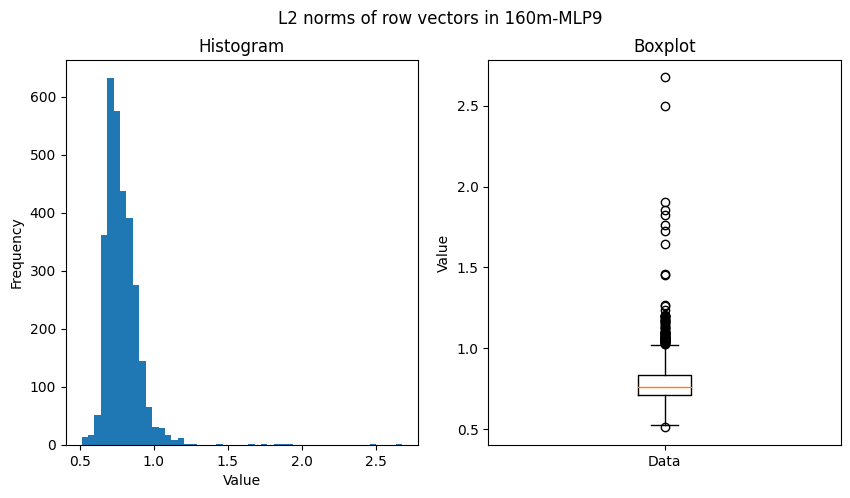

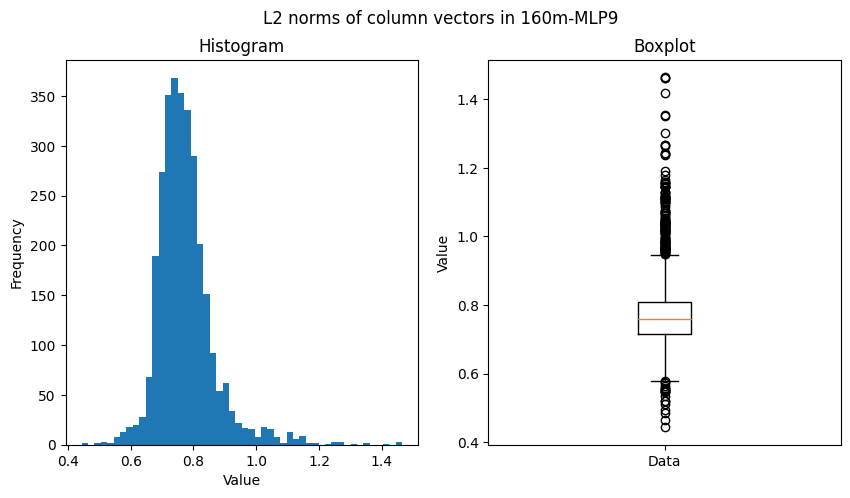

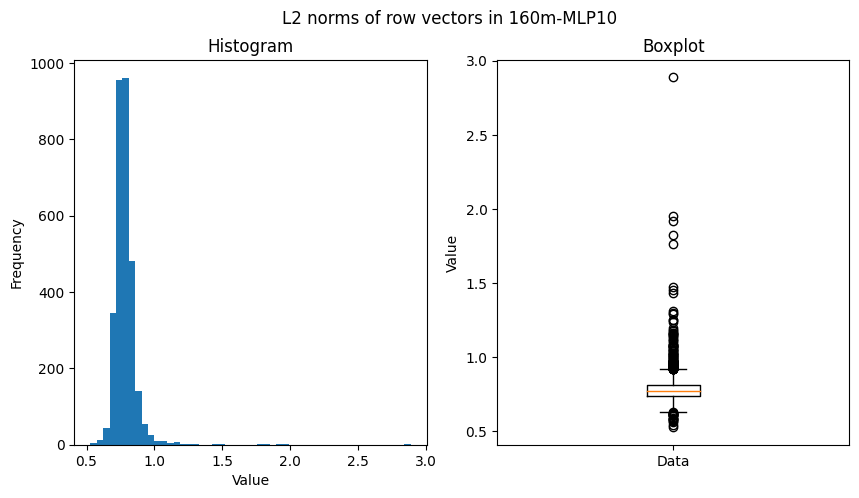

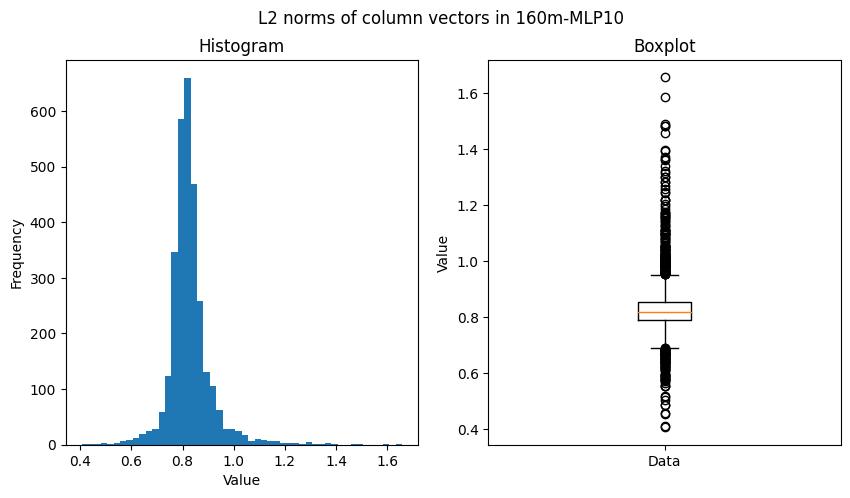

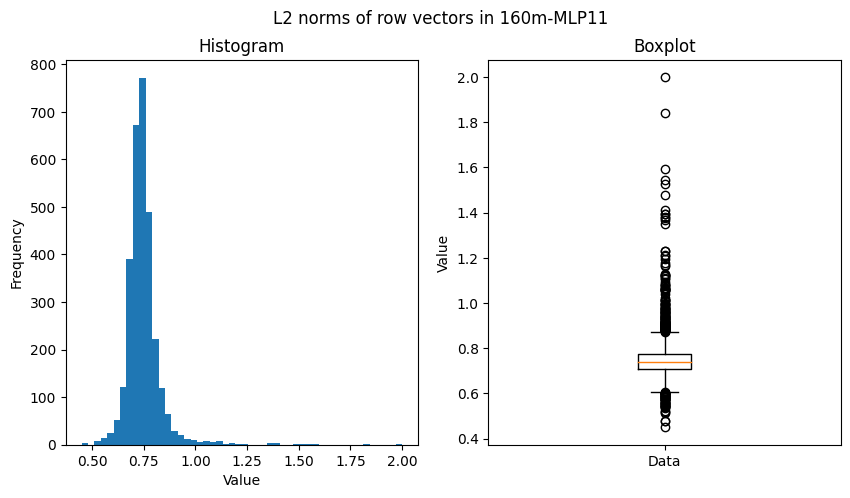

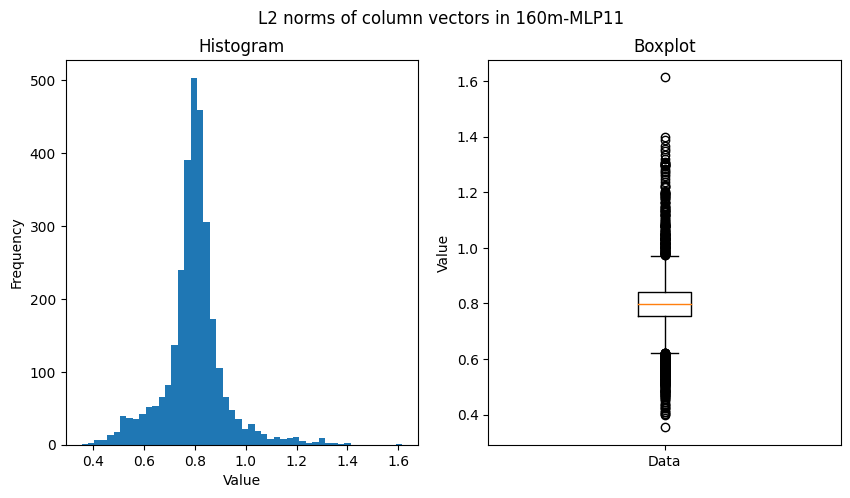

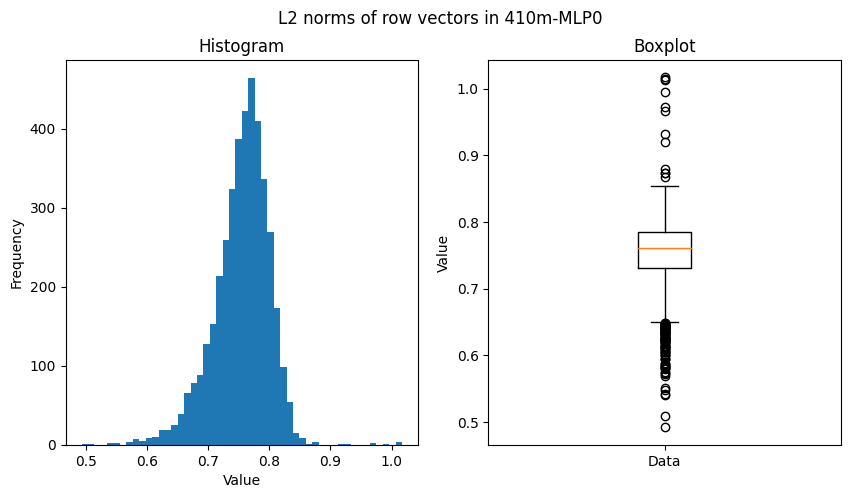

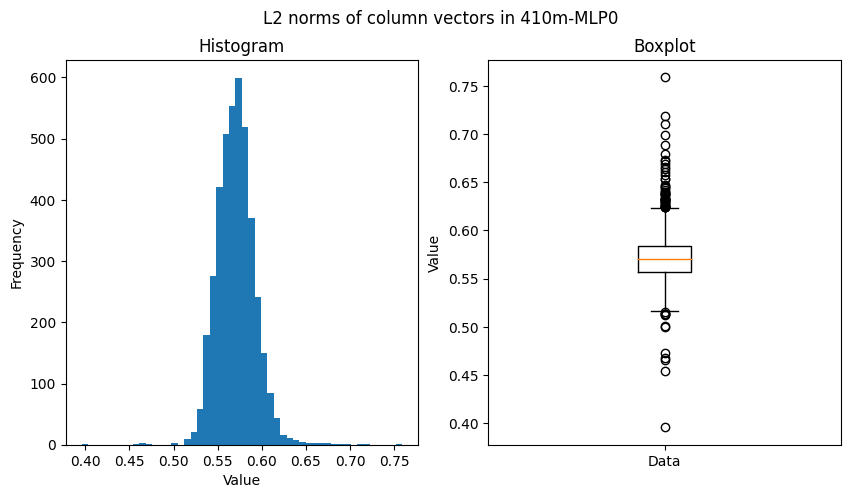

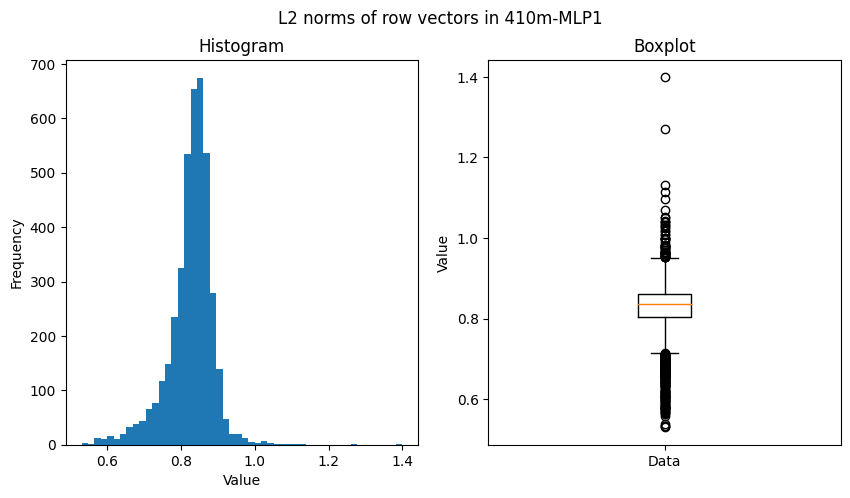

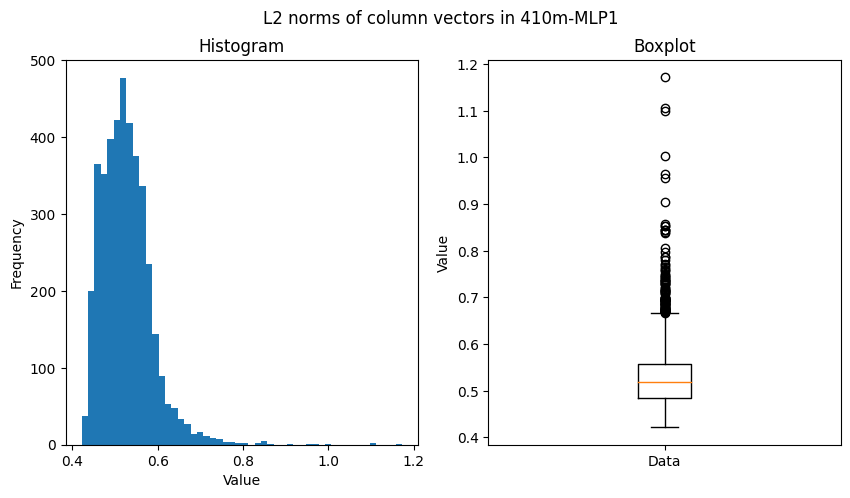

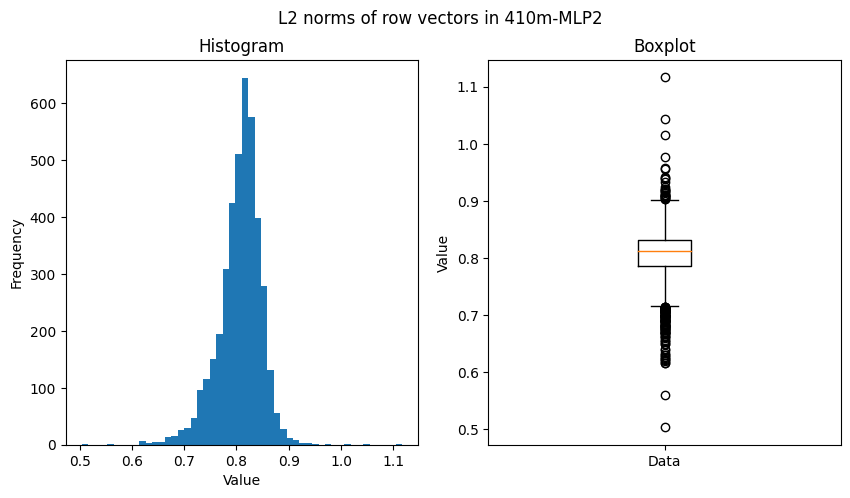

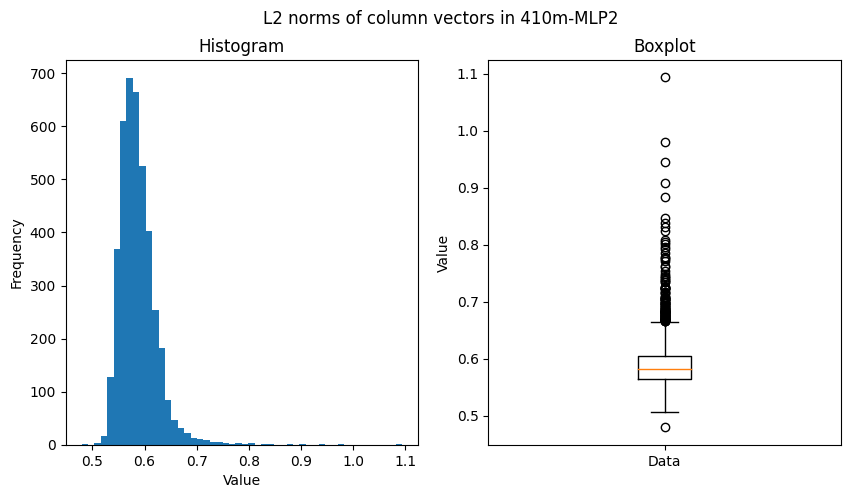

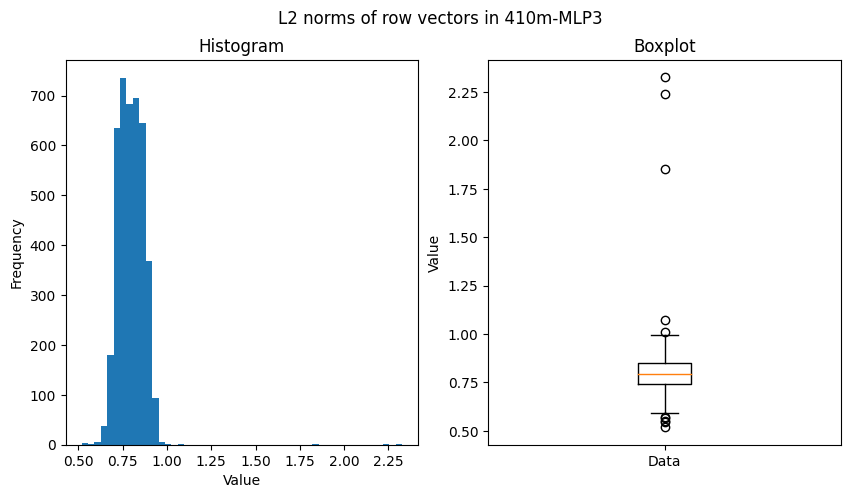

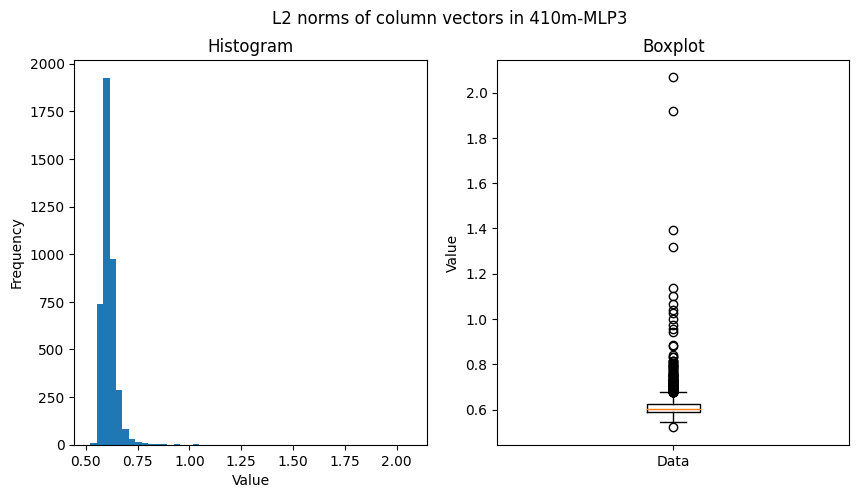

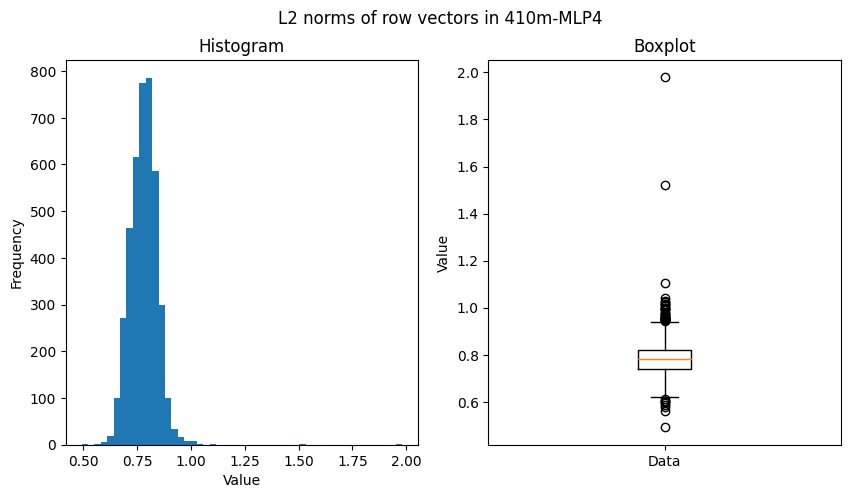

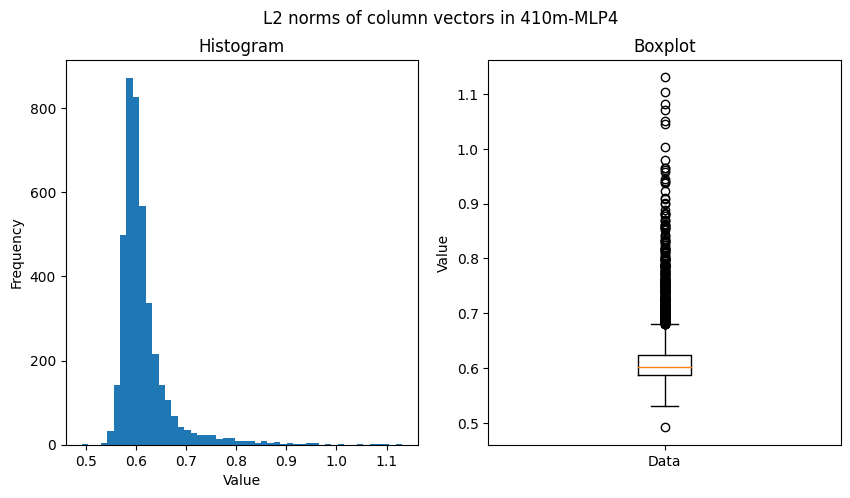

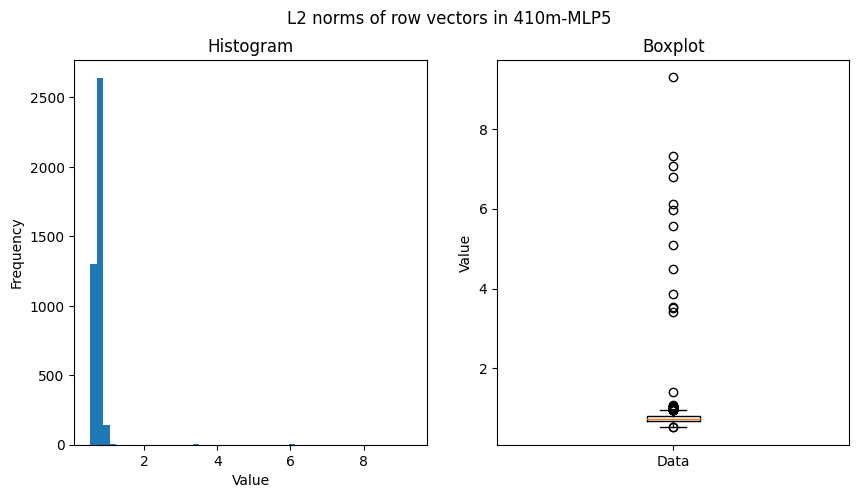

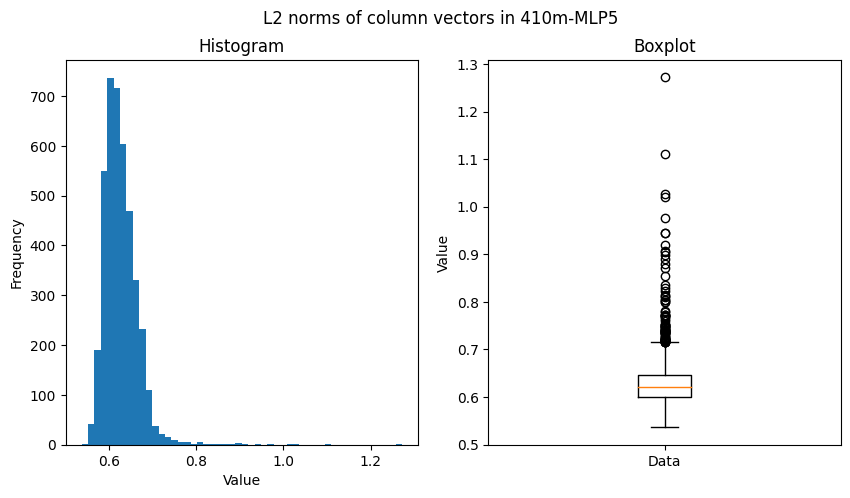

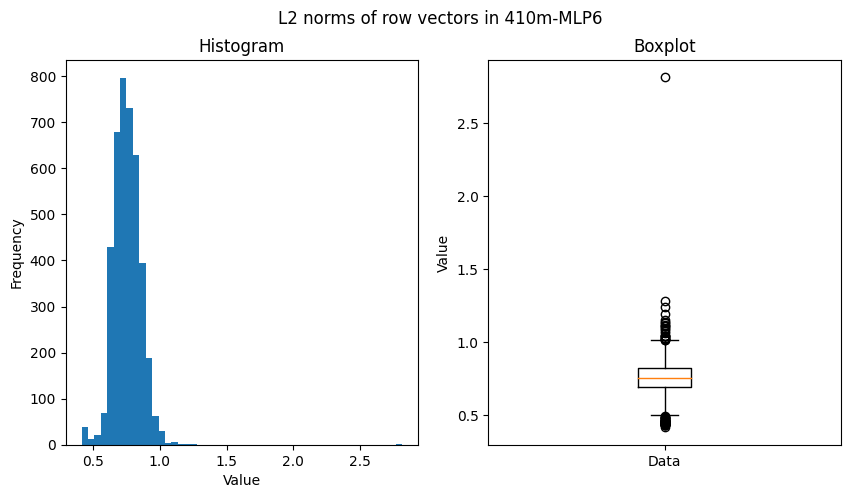

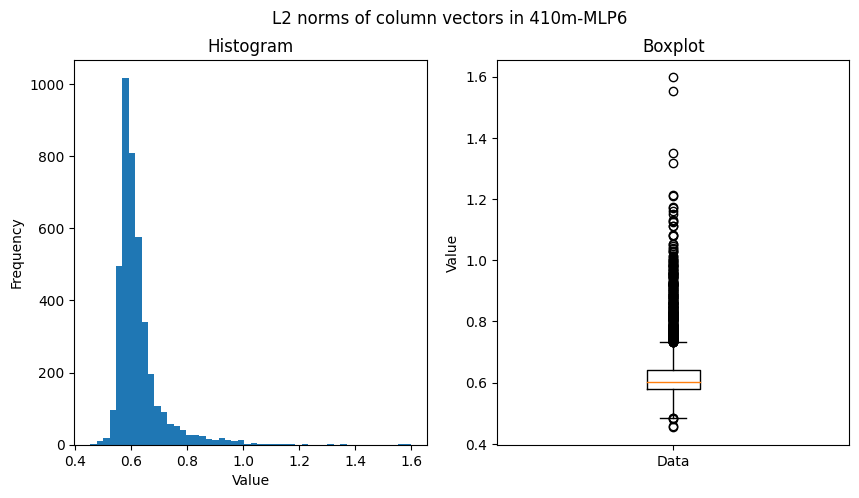

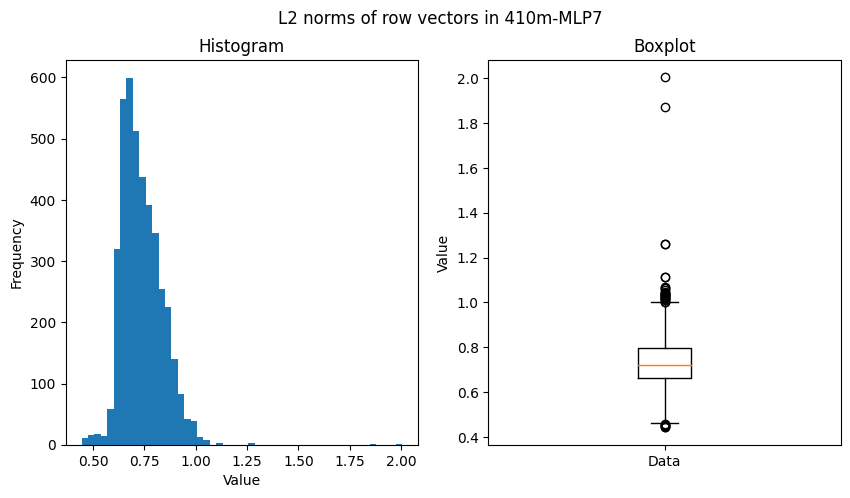

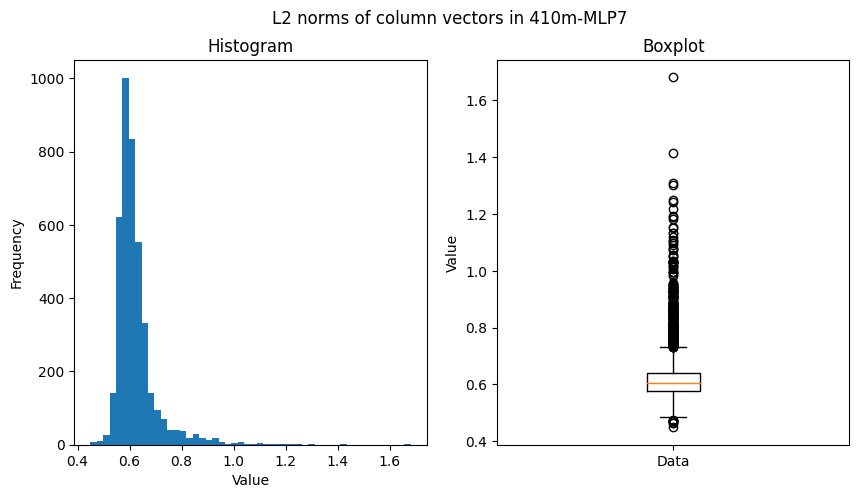

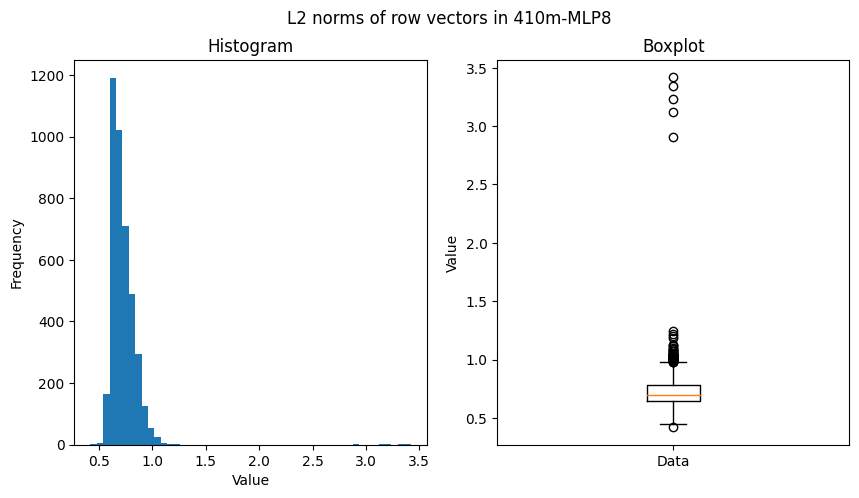

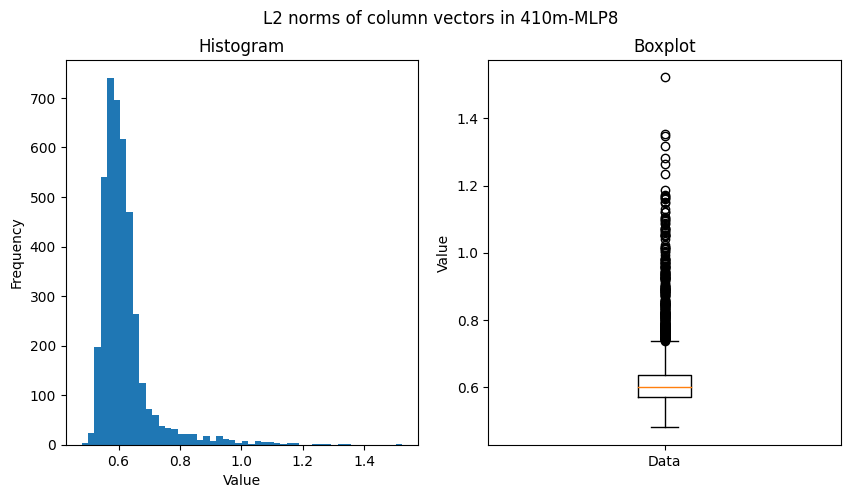

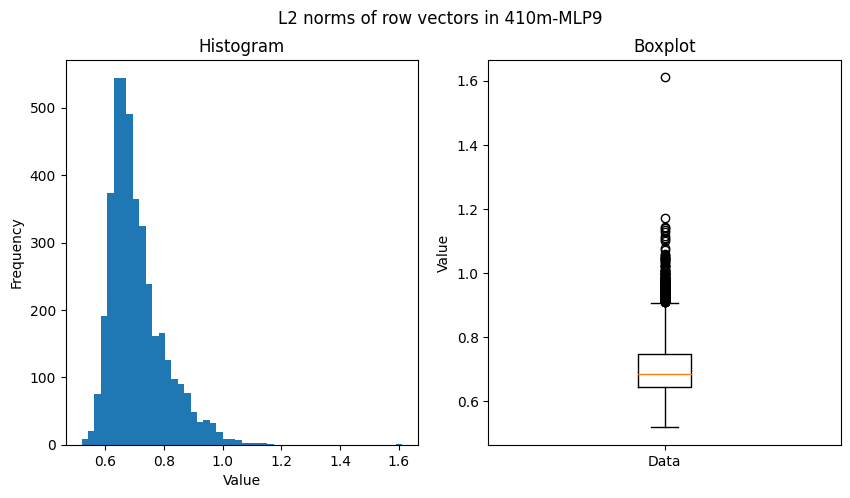

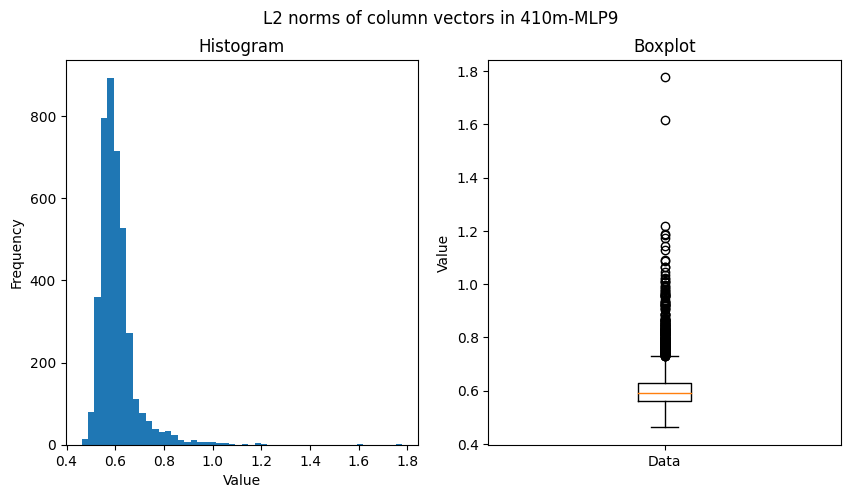

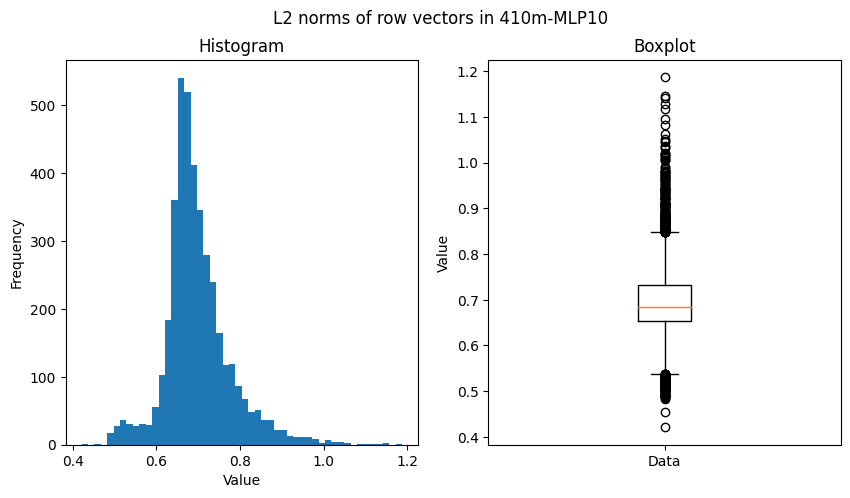

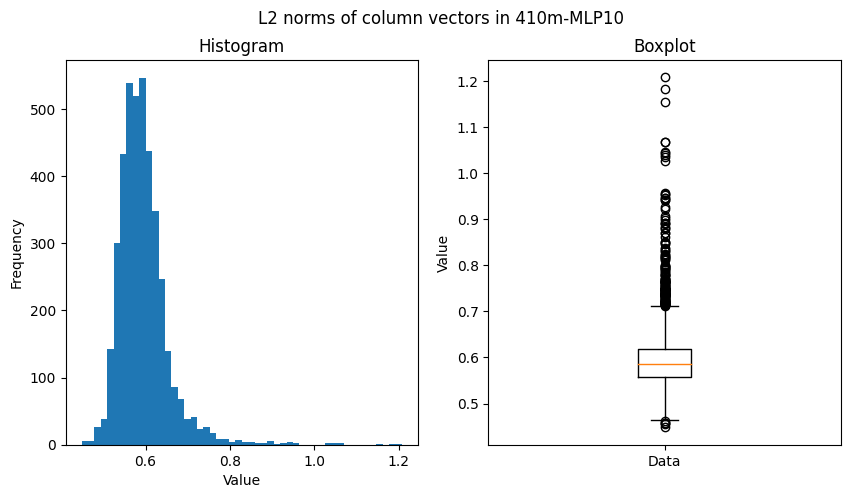

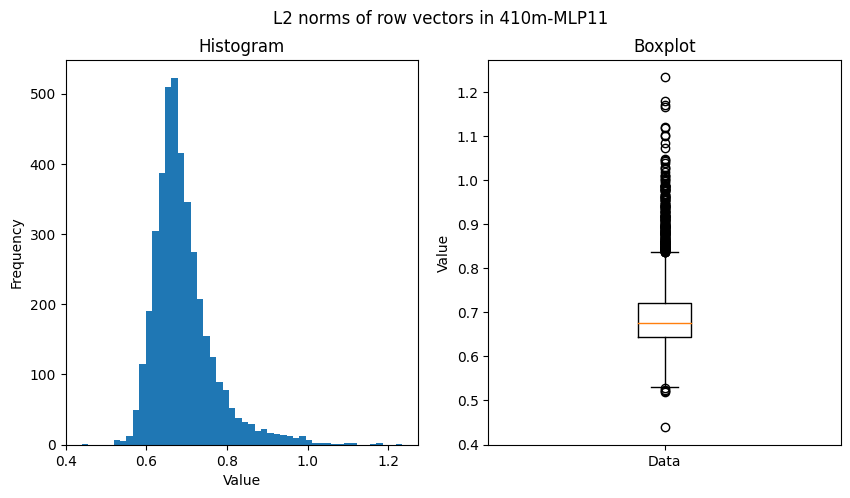

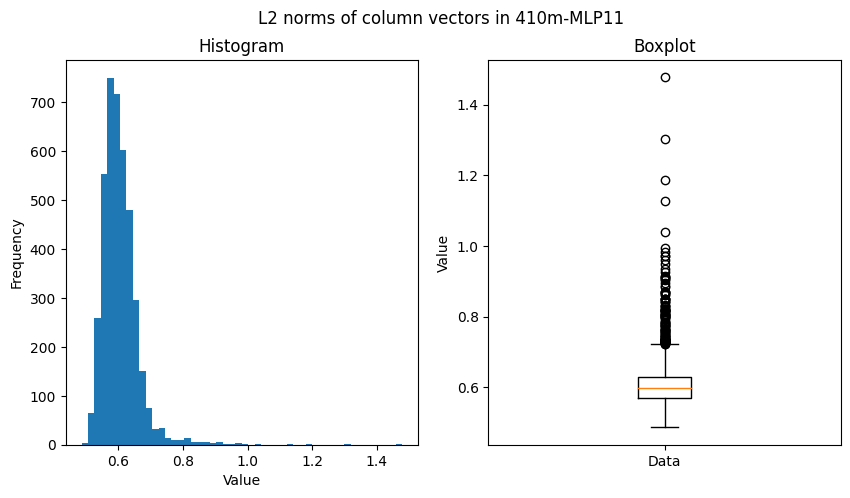

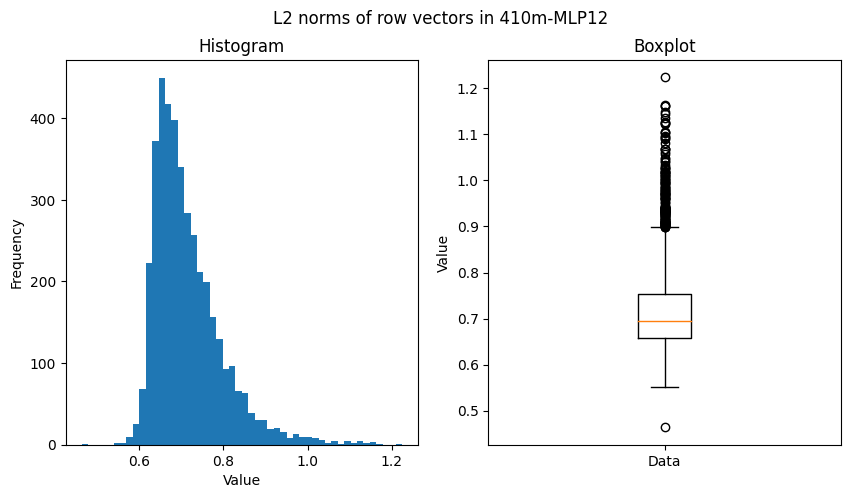

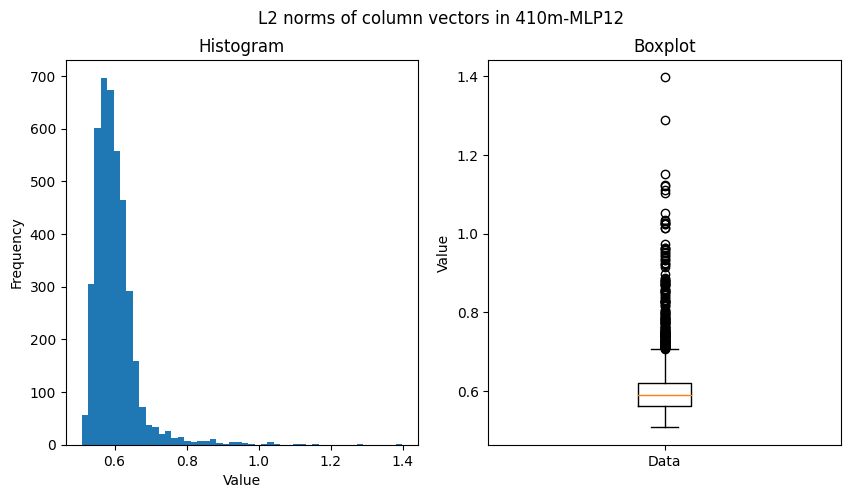

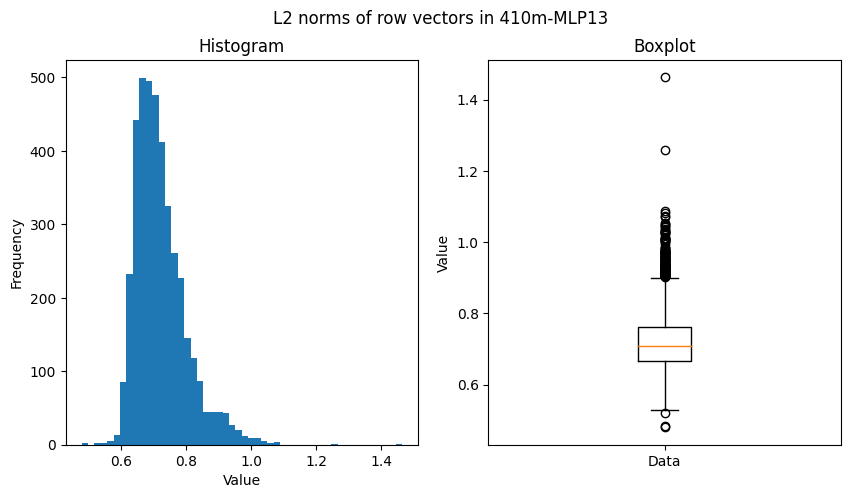

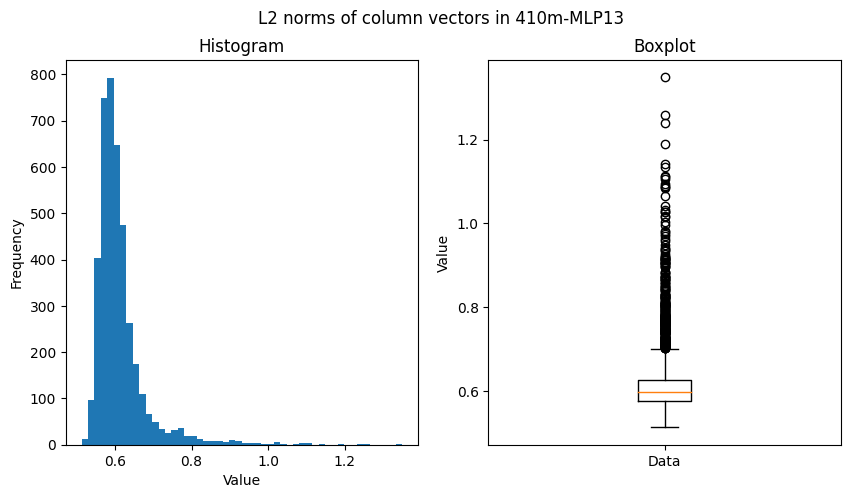

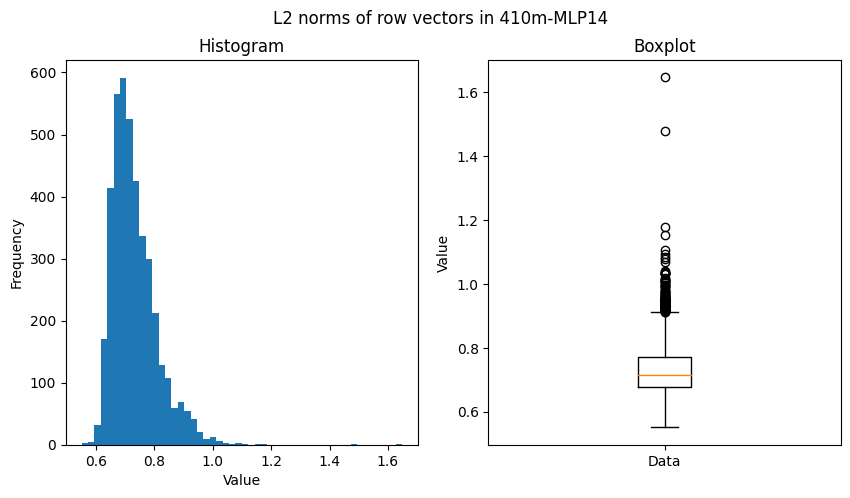

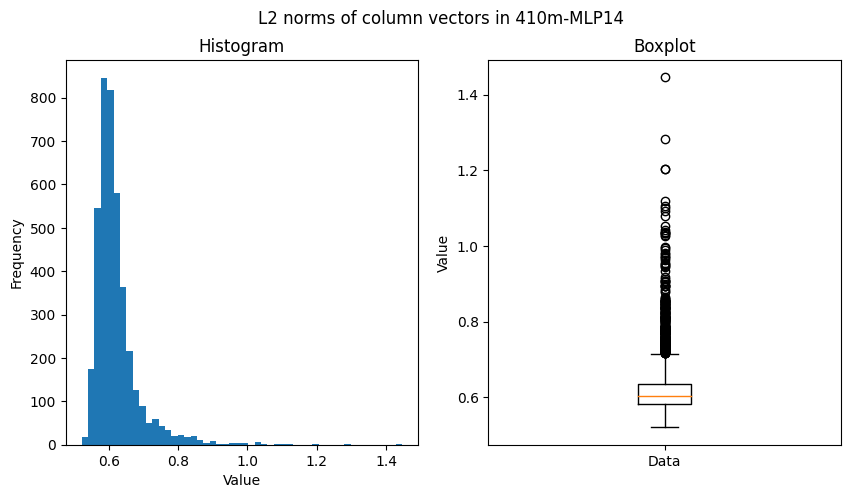

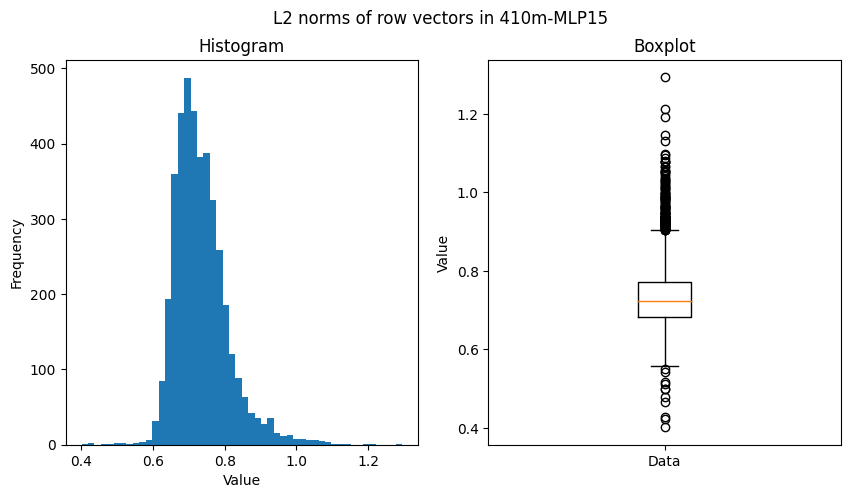

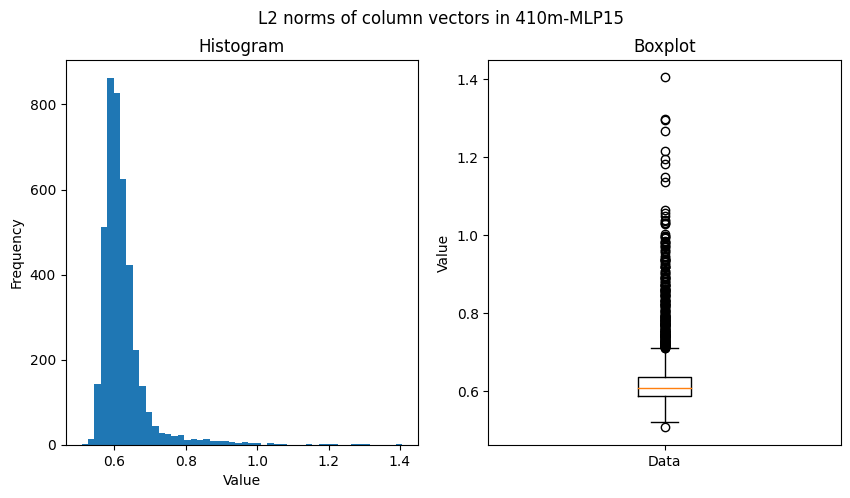

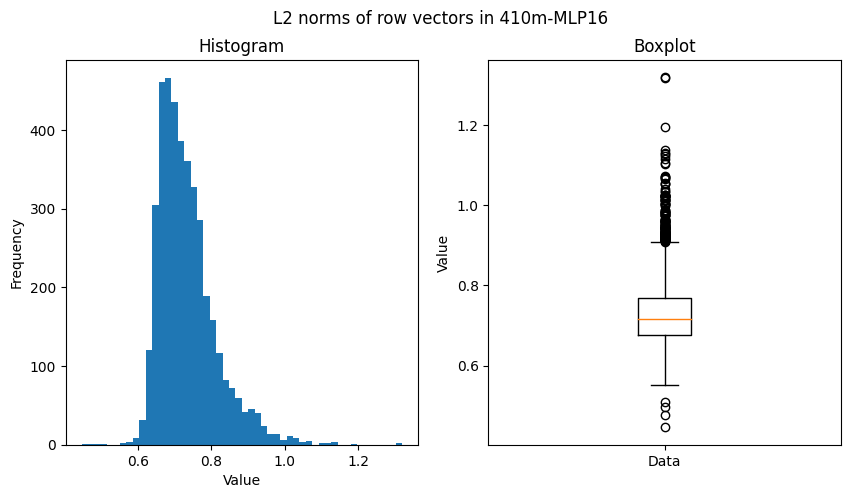

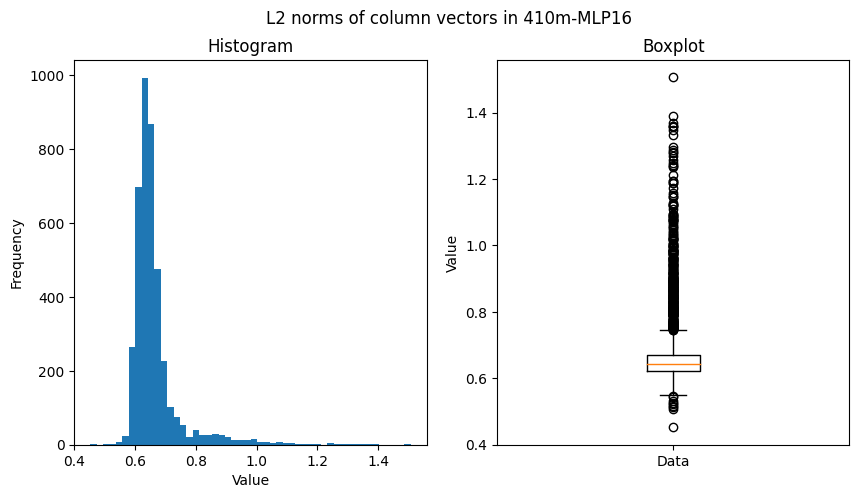

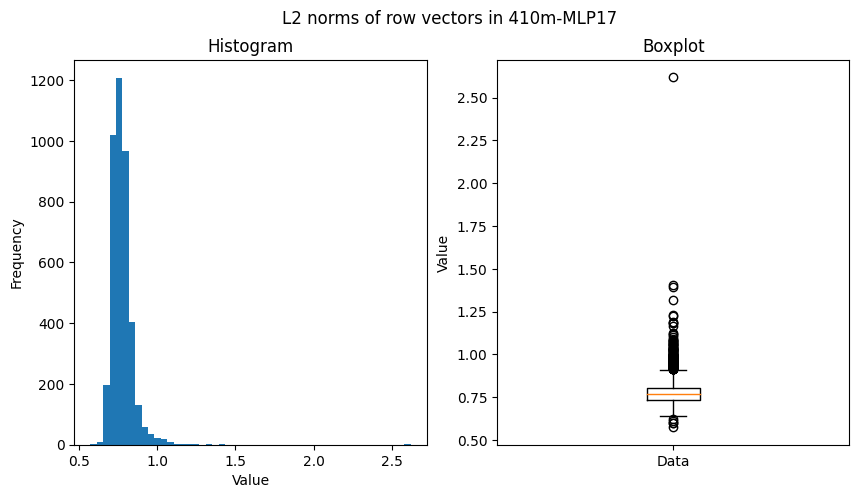

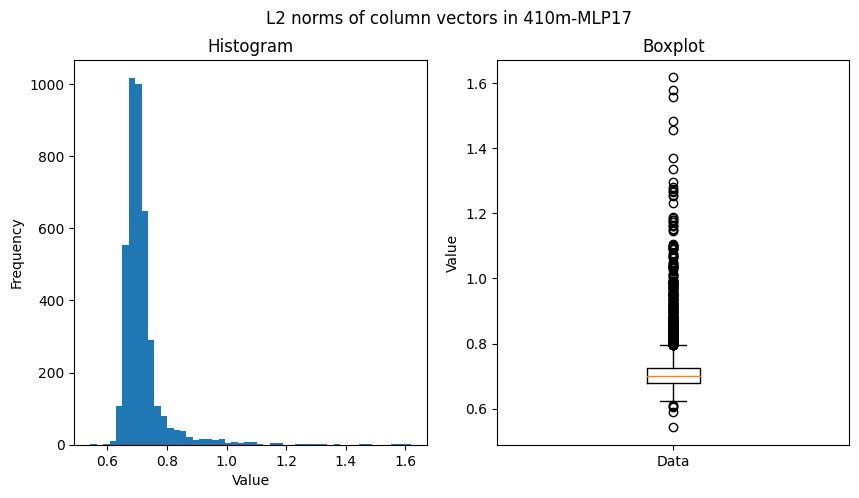

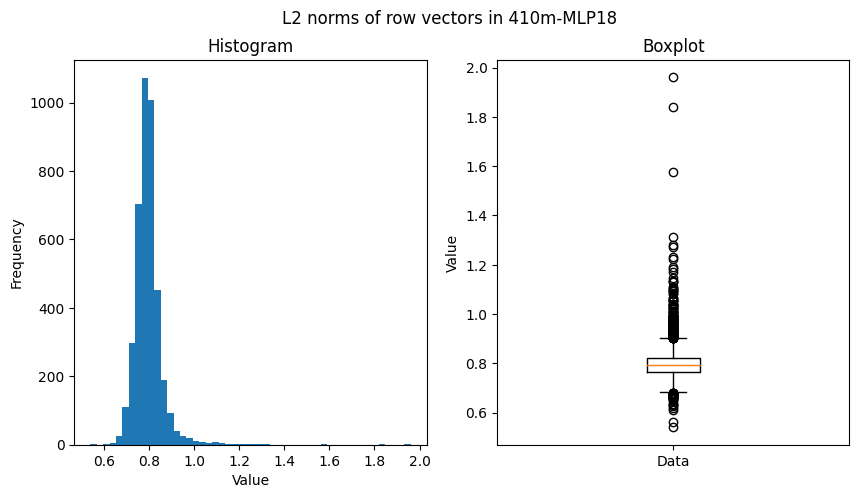

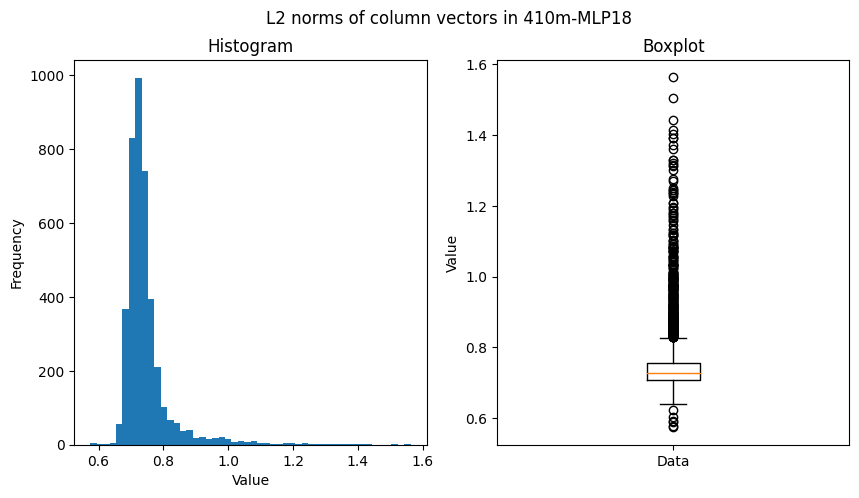

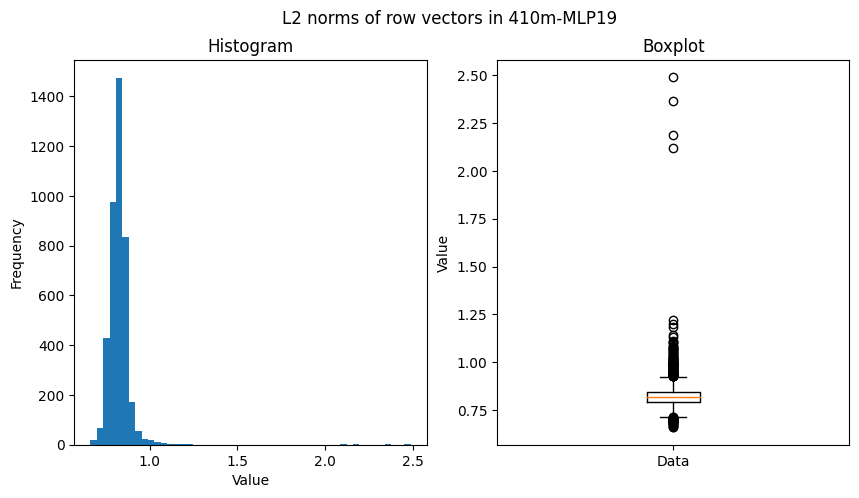

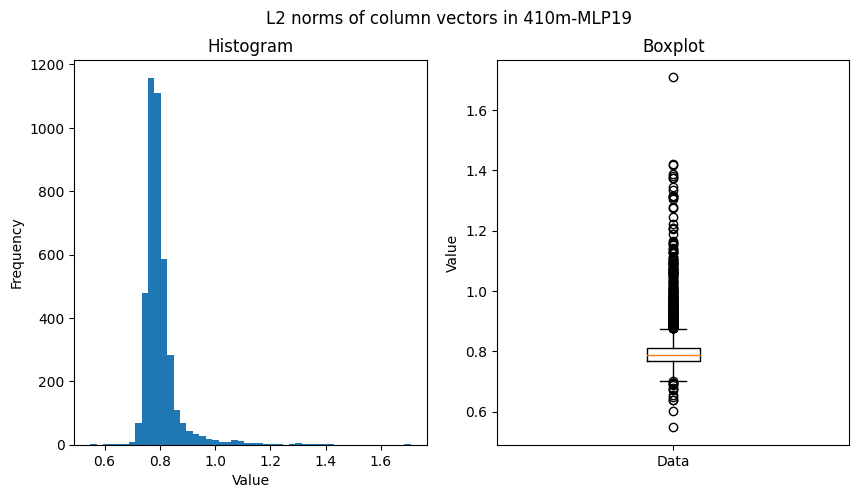

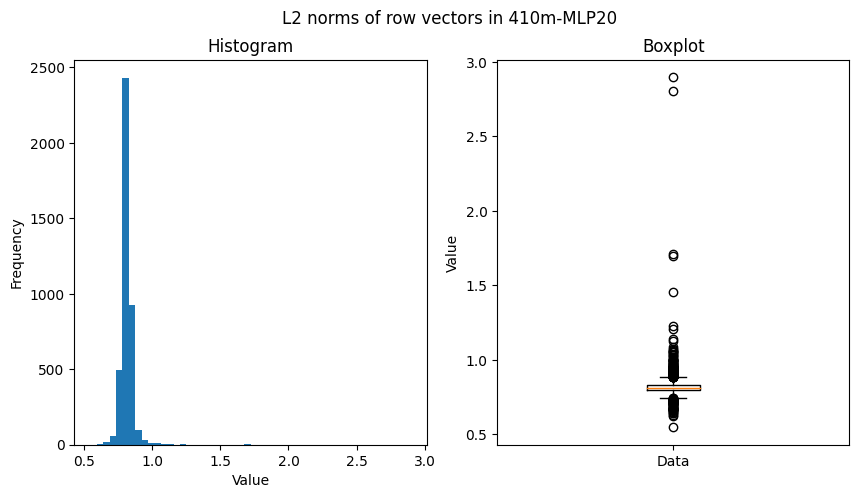

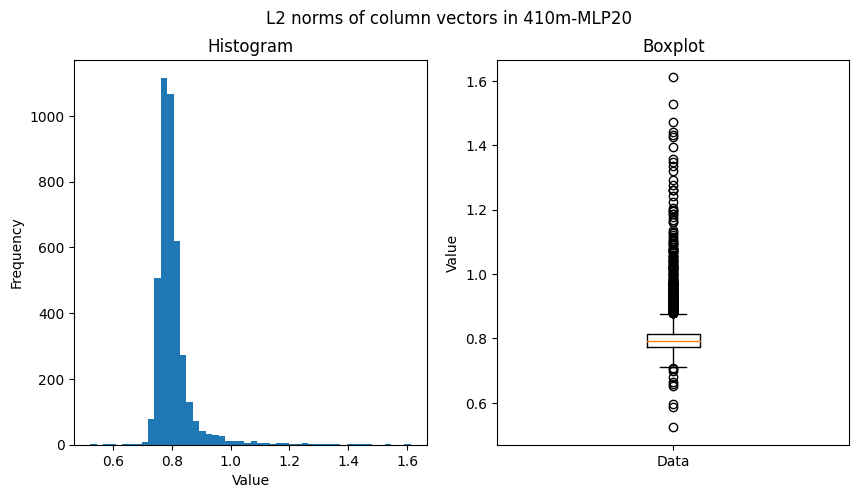

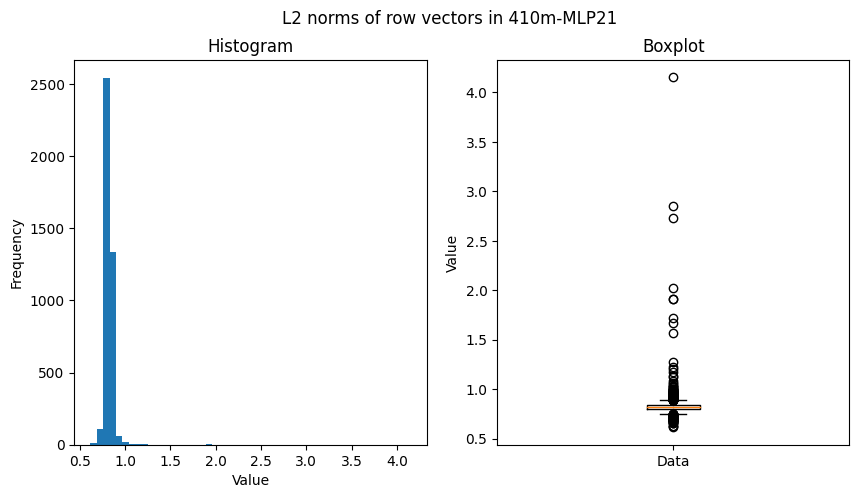

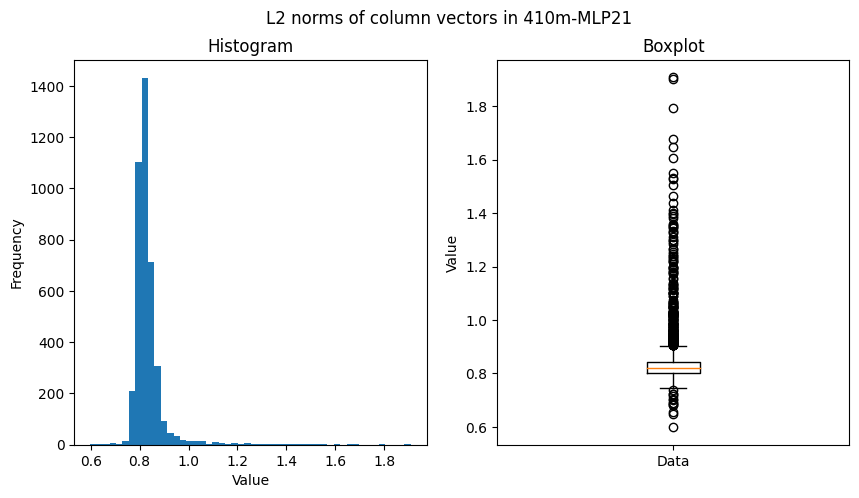

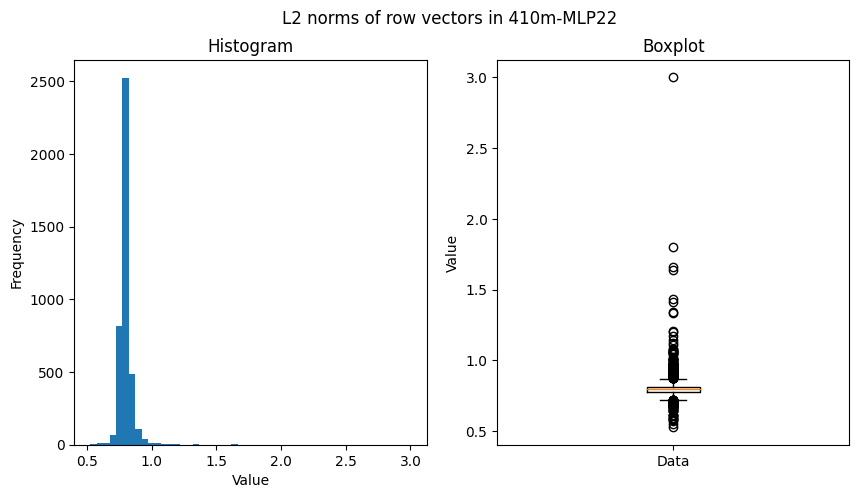

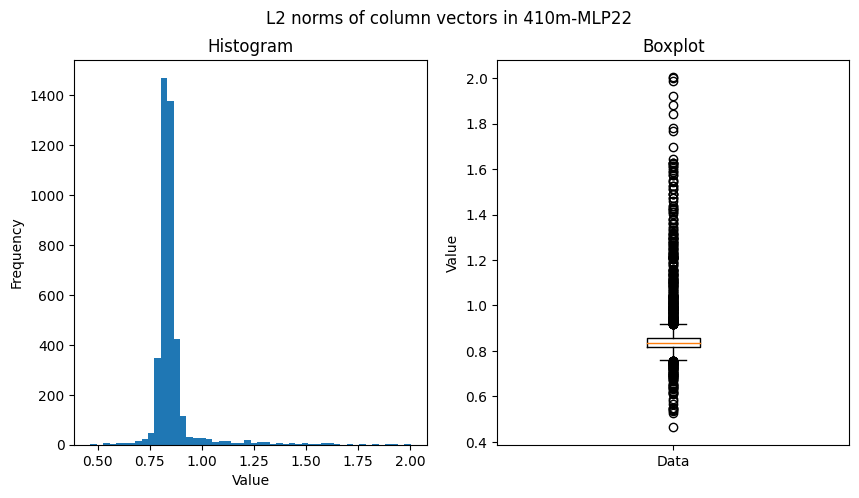

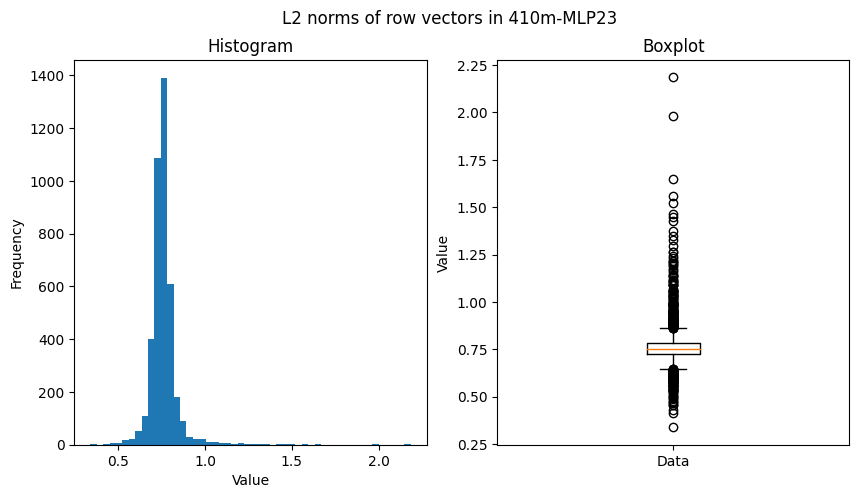

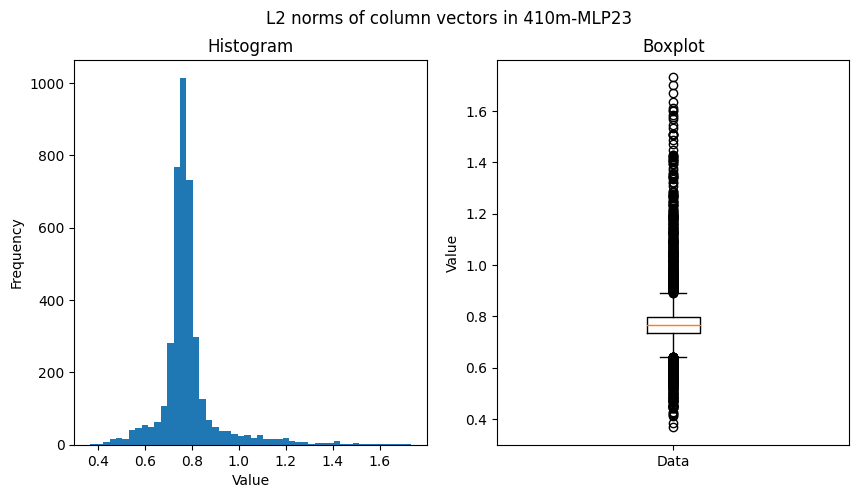

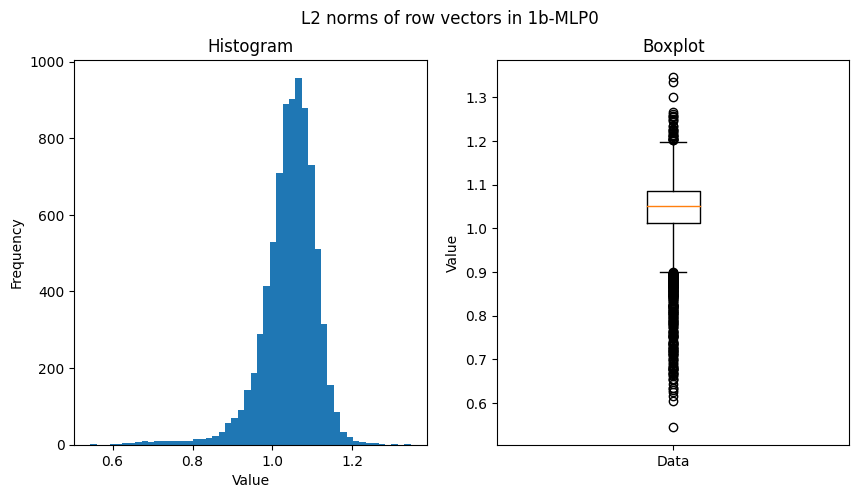

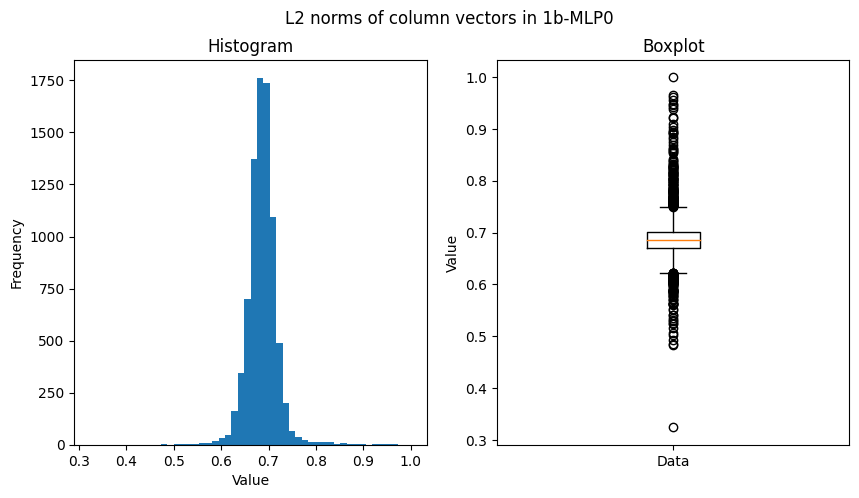

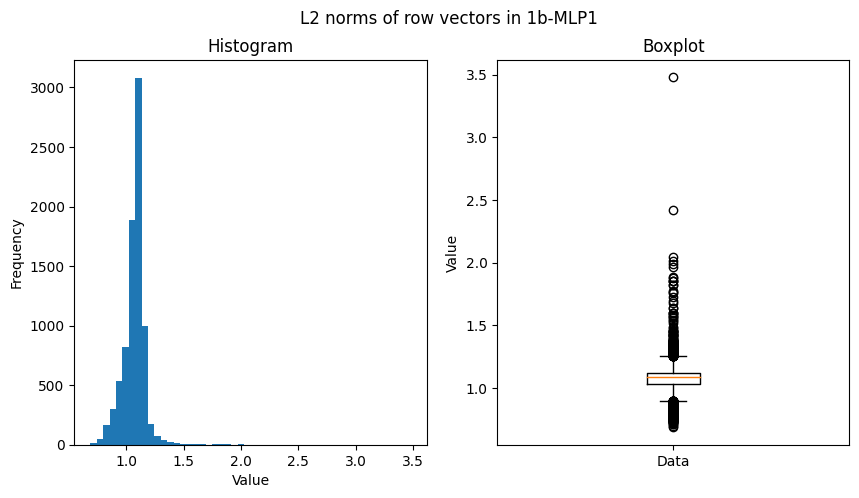

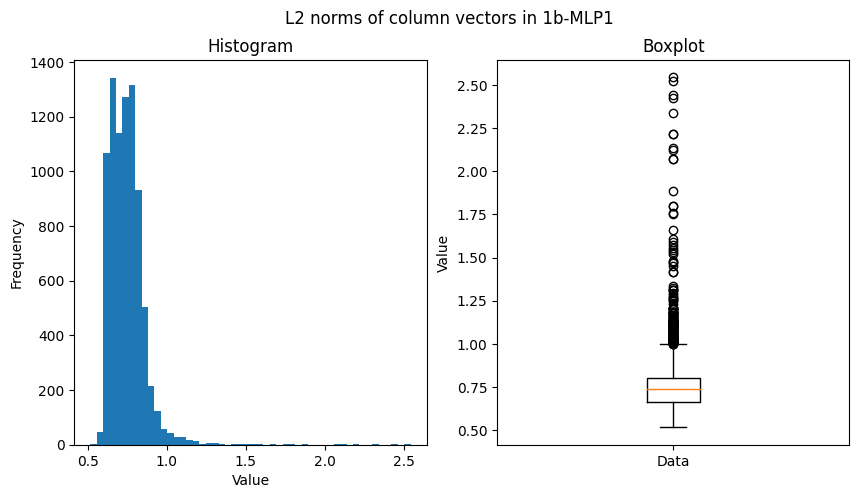

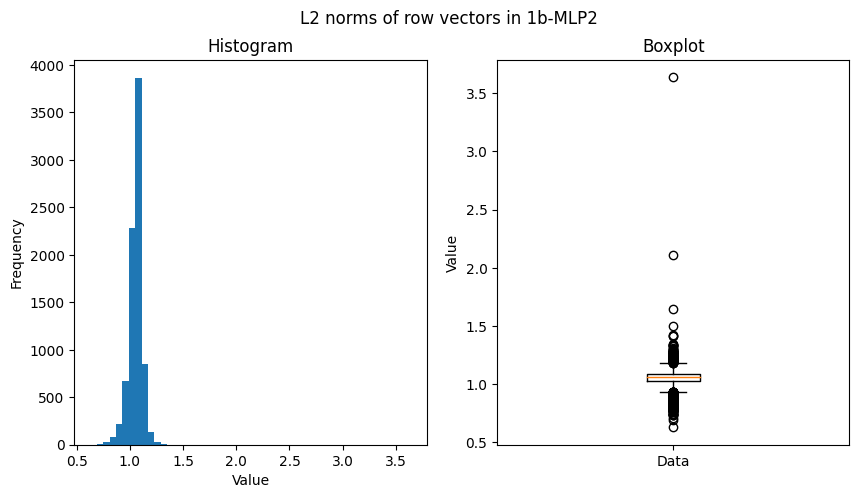

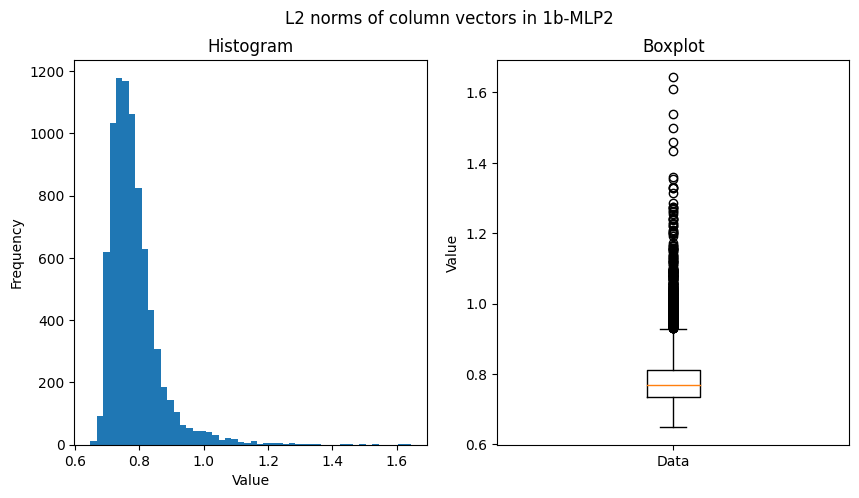

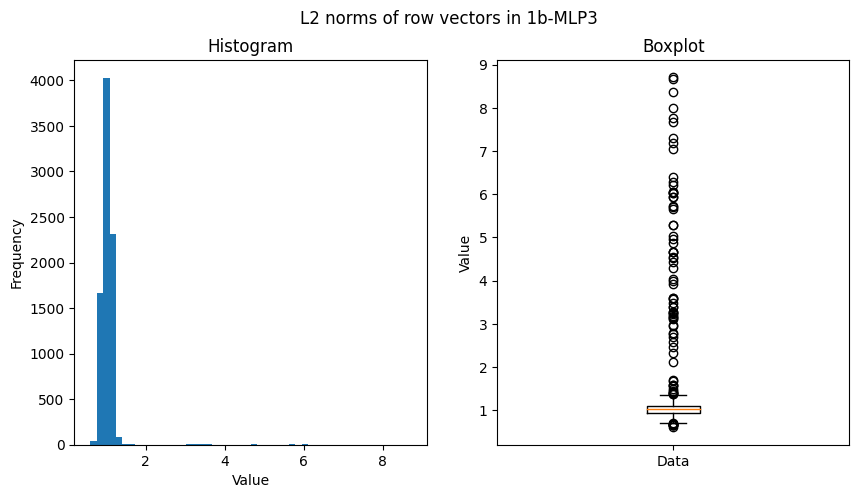

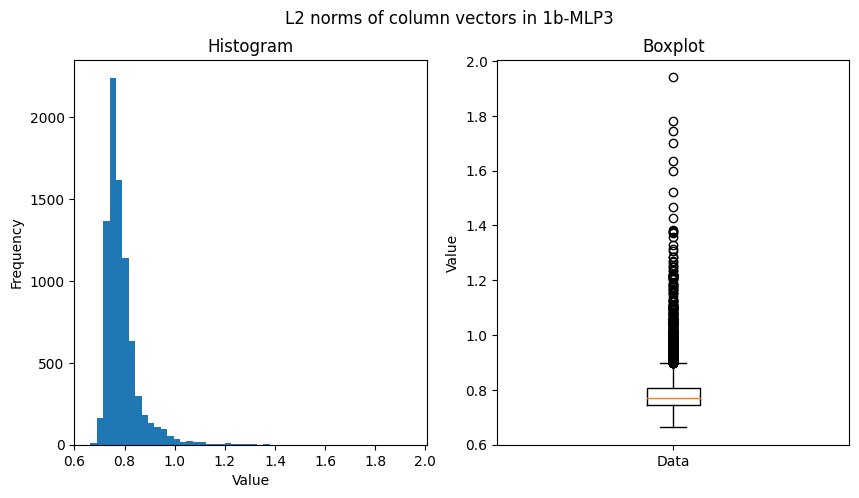

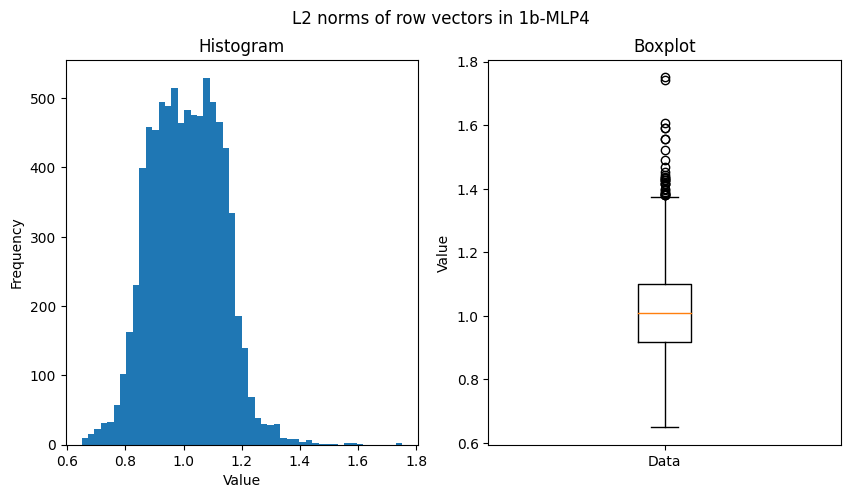

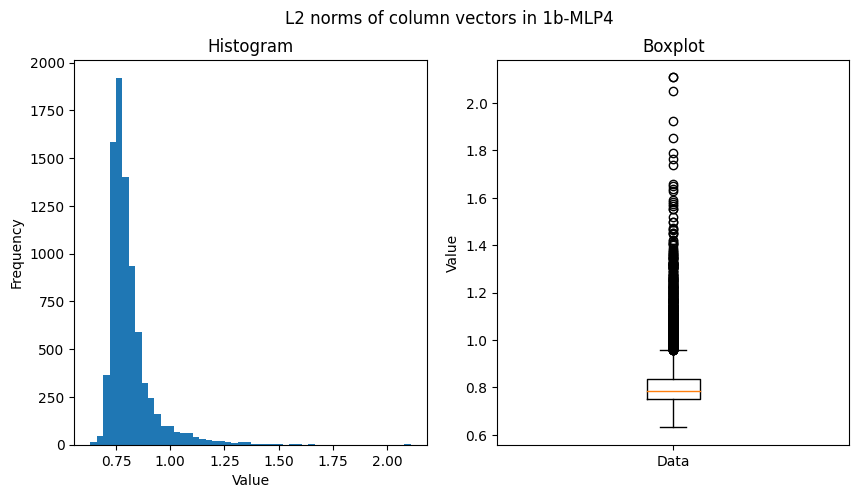

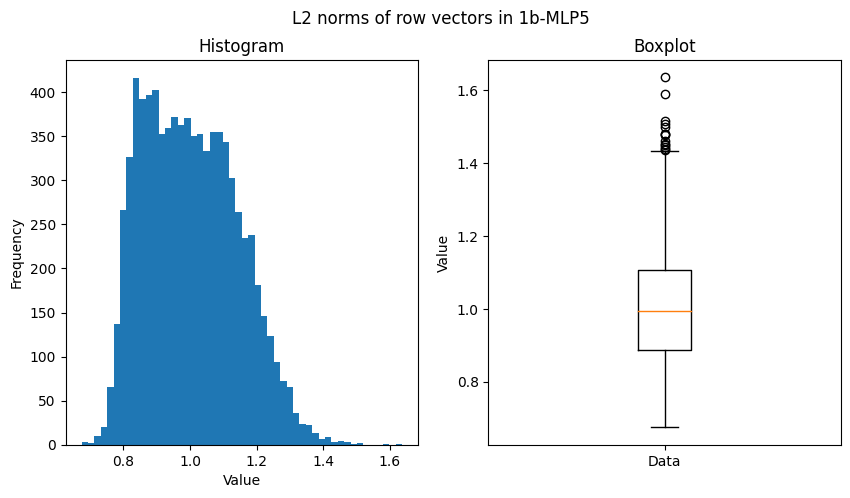

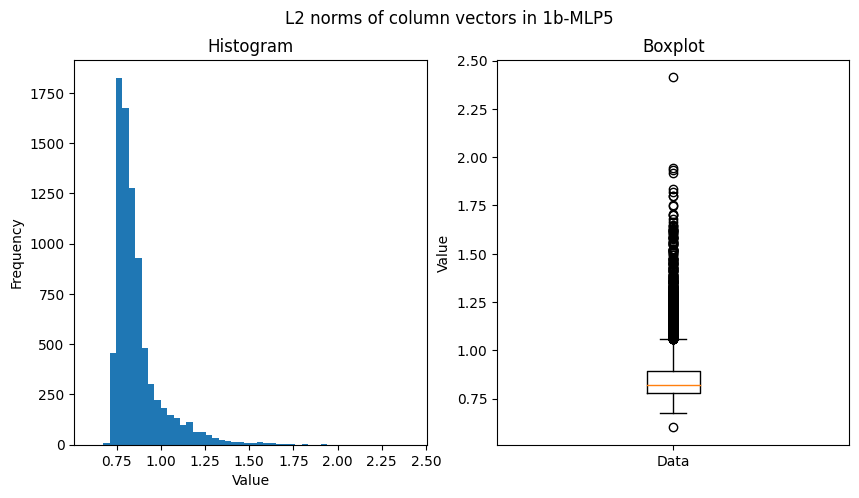

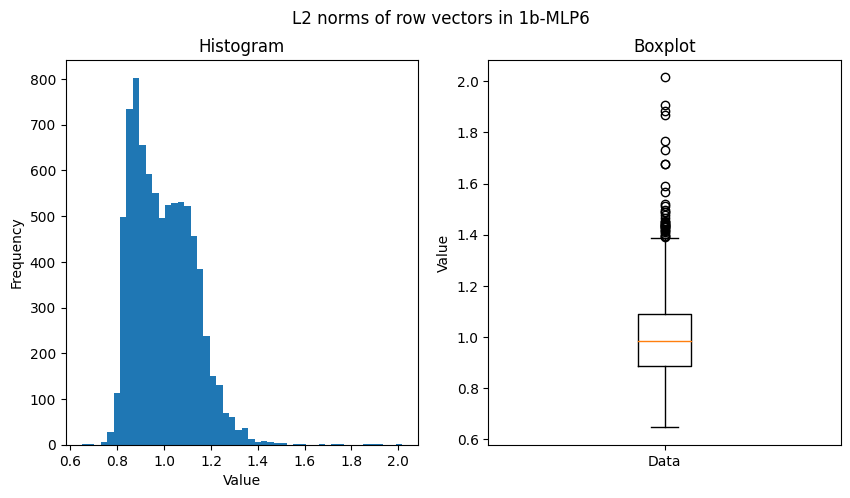

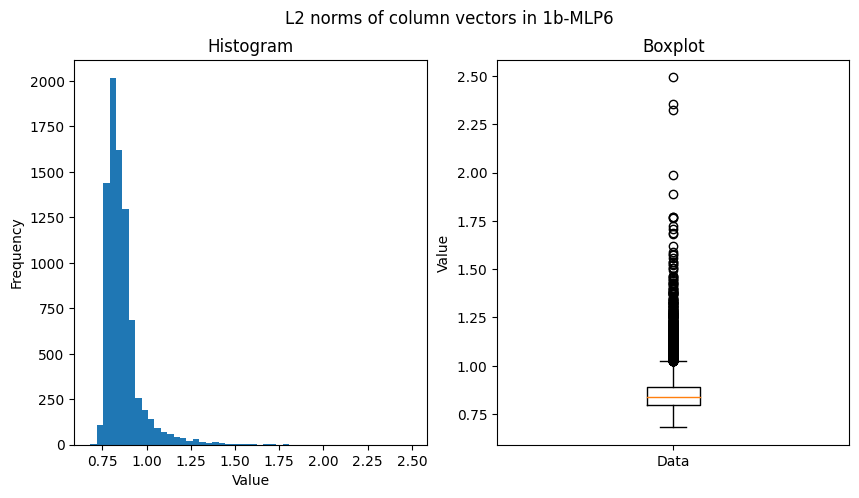

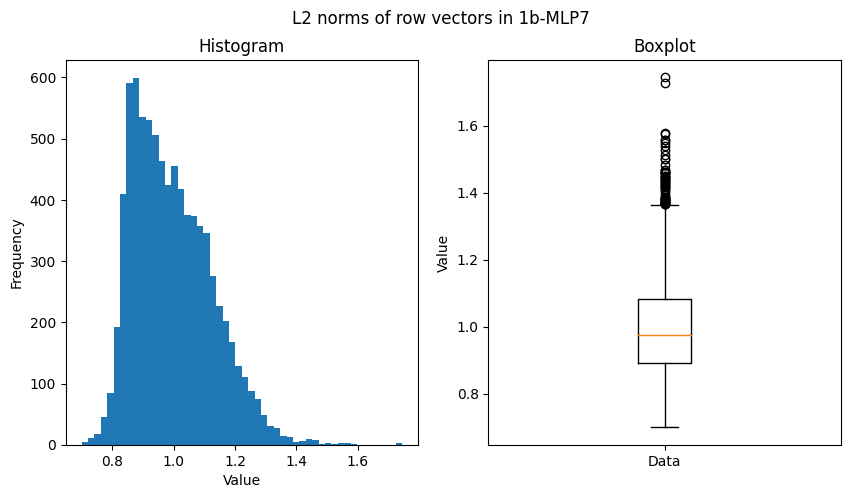

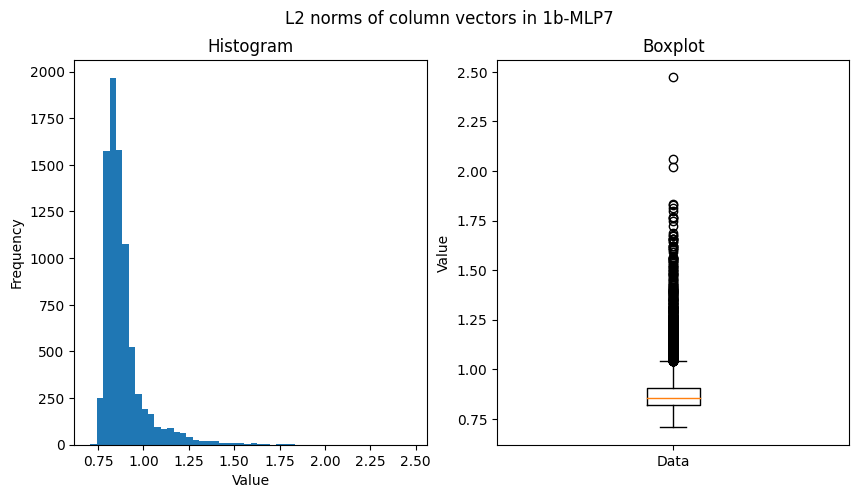

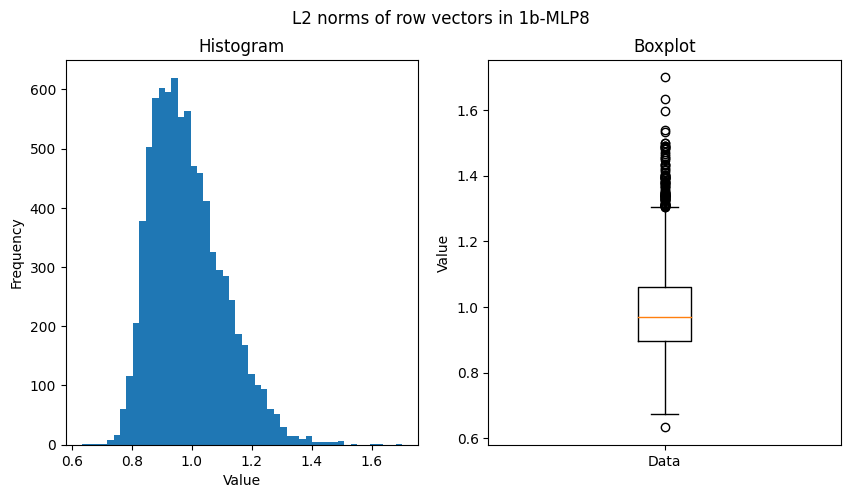

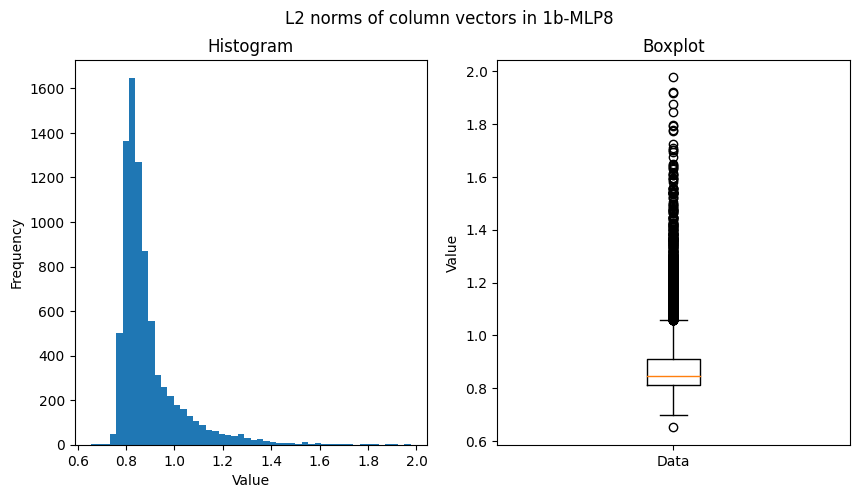

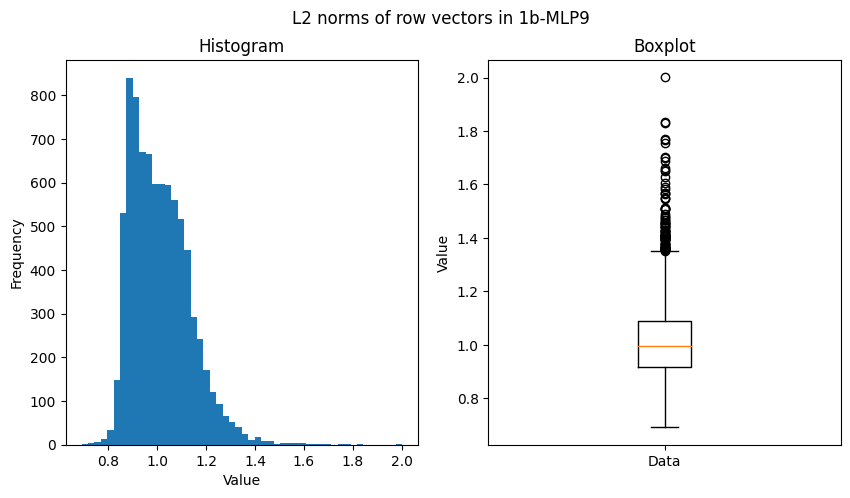

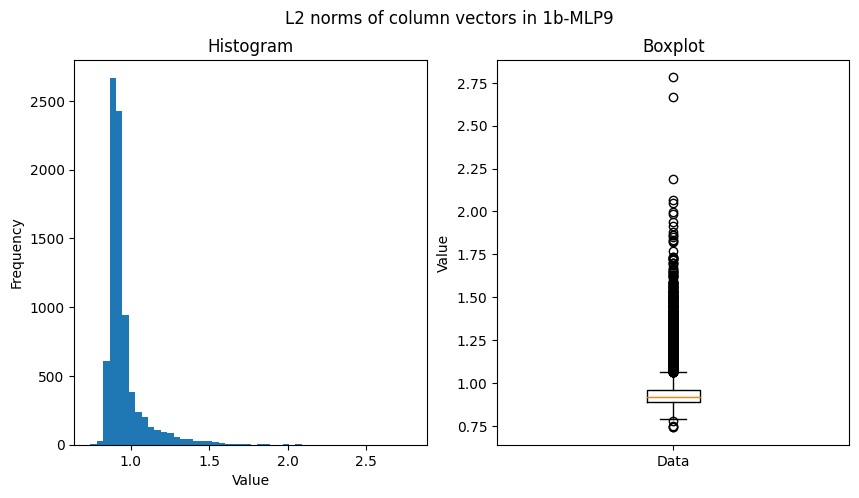

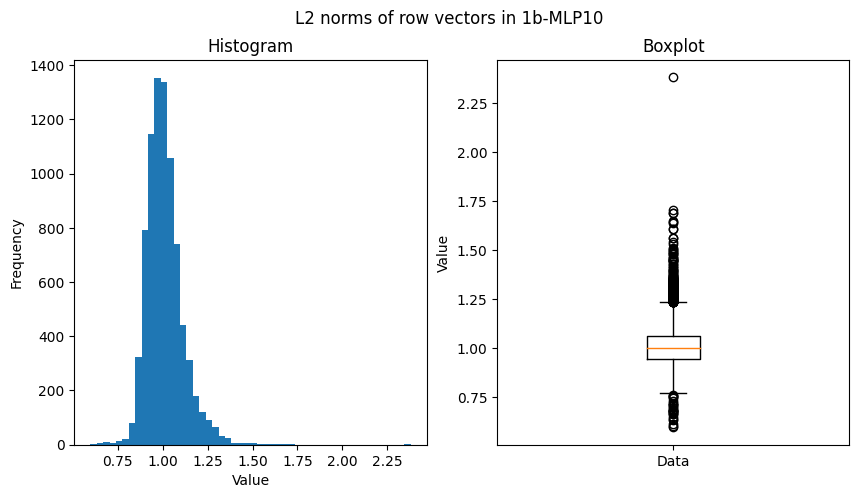

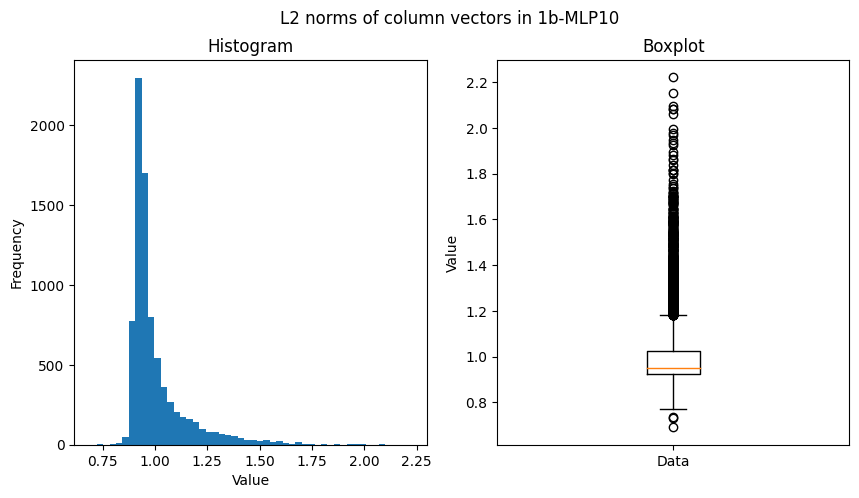

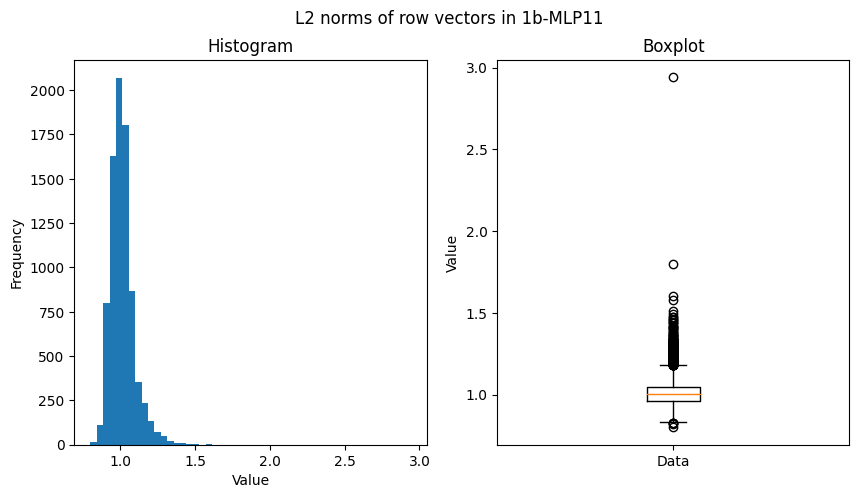

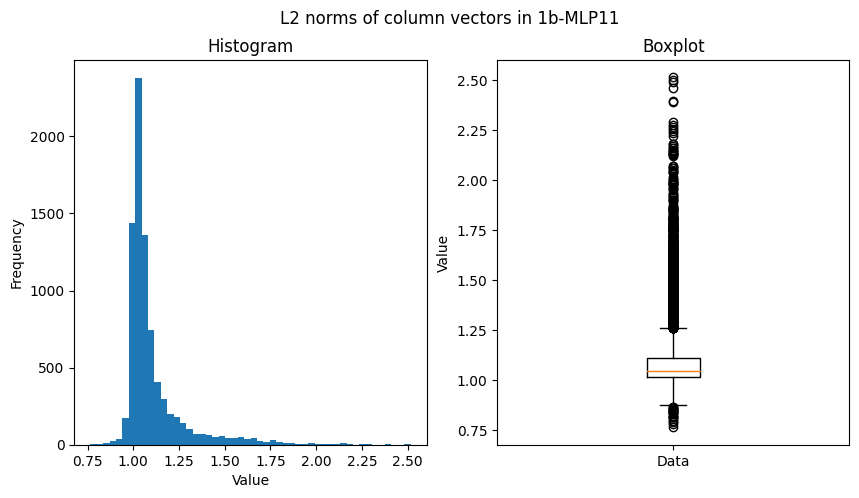

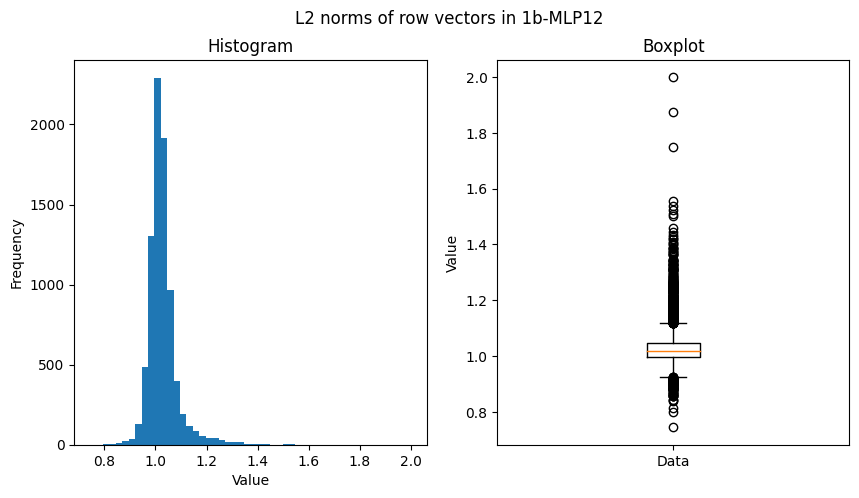

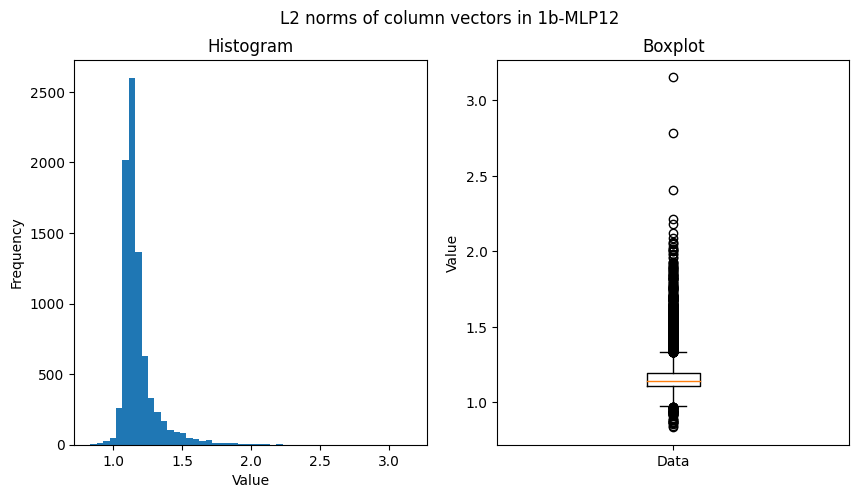

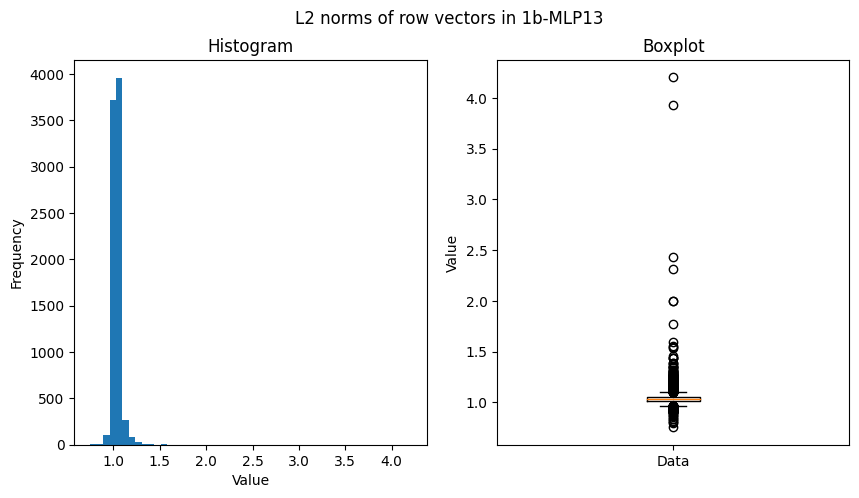

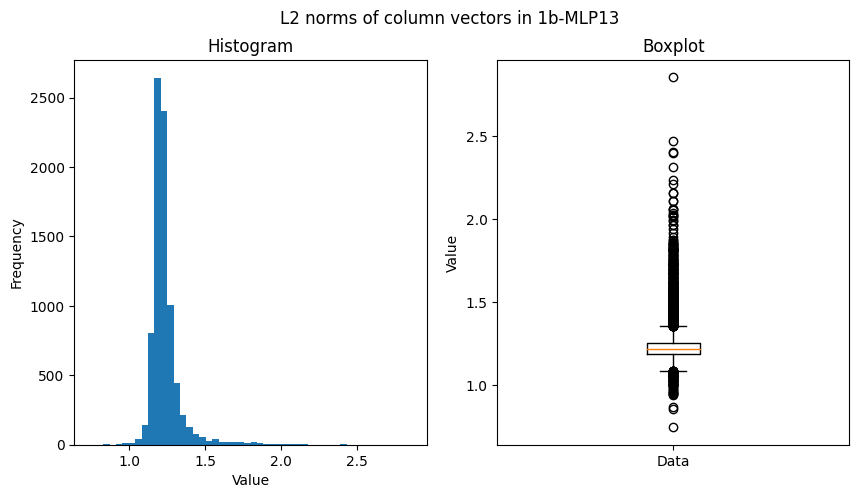

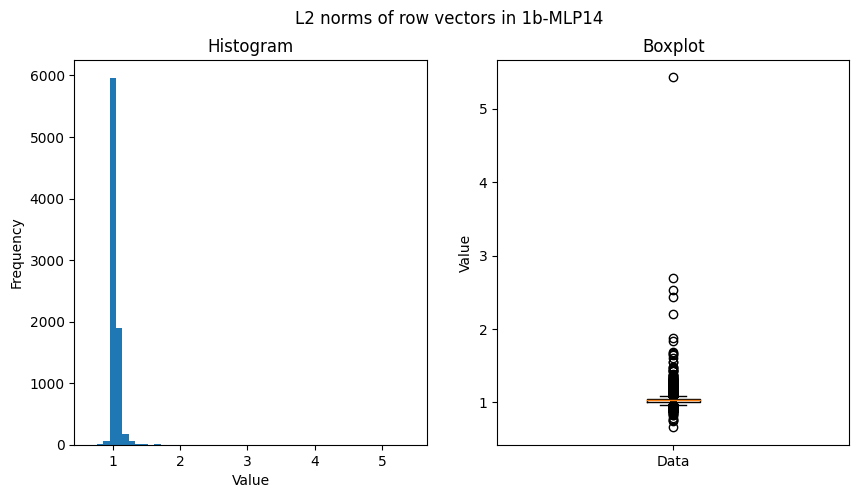

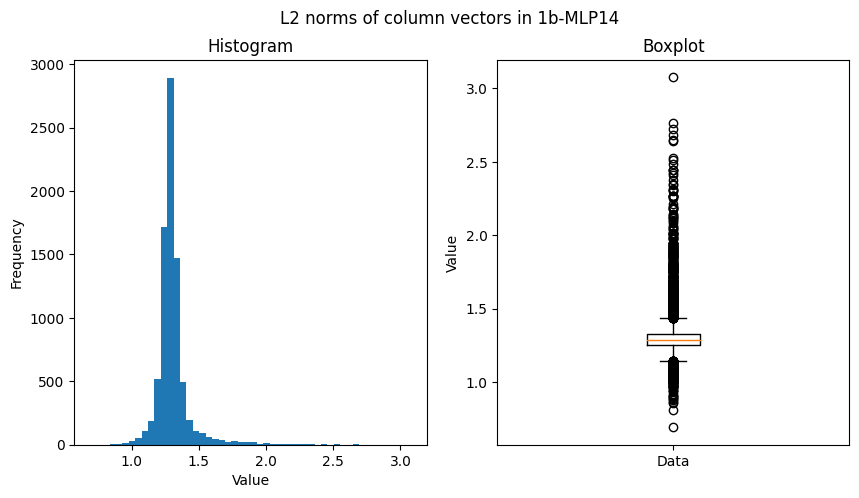

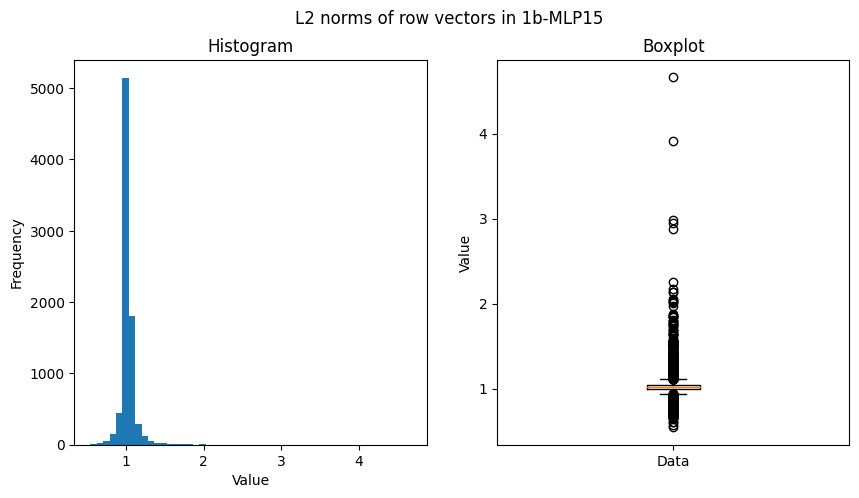

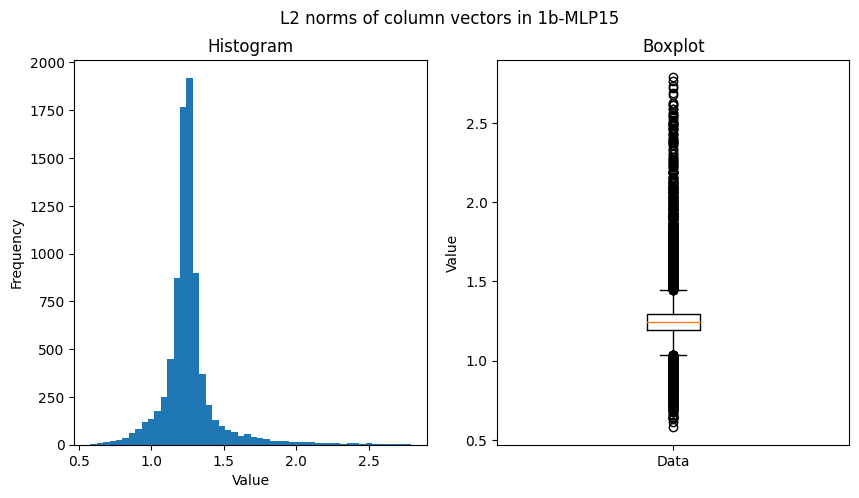

In [6]:
in_norms_dict = {}
out_norms_dict = {}
for model_name, model in yield_models():
  W_in_norms_list = []
  W_out_norms_list = []
  for layer_id in range(get_n_layers(model)):
    W_out = model.gpt_neox.layers[layer_id].mlp.dense_4h_to_h.weight.detach()
    W_in = model.gpt_neox.layers[layer_id].mlp.dense_h_to_4h.weight.detach()
    W_in_norms = torch.norm(W_in, dim=1)
    W_out_norms = torch.norm(W_out, dim=0)
    W_in_norms_list.append(W_in_norms)
    W_out_norms_list.append(W_out_norms)
    hist_and_box(W_in_norms, title=f'L2 norms of row vectors in {model_name}-MLP{layer_id}', save_filename=f'plots_in/mlp_row_norm_{model_name}-{layer_id}.png')
    hist_and_box(W_out_norms, title=f'L2 norms of column vectors in {model_name}-MLP{layer_id}', save_filename=f'plots_out/mlp_col_norm_{model_name}-{layer_id}.png')
  in_norms_dict[model_name] = torch.stack(W_in_norms_list)
  out_norms_dict[model_name] = torch.stack(W_out_norms_list)
norms_dict = {
    'rows': in_norms_dict,
    'columns': out_norms_dict
}

In [8]:
norms_dict = {
    'rows': in_norms_dict,
    'columns': out_norms_dict
}

In [9]:
torch.save(norms_dict, '/content/mlp_norms.pt')

In [19]:
# Generate the Markdown file
with open("plots_in.md", "w") as f:
    f.write("# Neural Network Layer Plots\n\n")
    for model_name, model in yield_models():
      for layer_id in range(get_n_layers(model)):
        f.write(f"![Layer {layer_id} Plots](plots/mlp_row_norm_{model_name}-{layer_id}.png)\n\n")

In [20]:
# Generate the Markdown file
with open("plots_out.md", "w") as f:
    f.write("# Neural Network Layer Plots\n\n")
    for model_name, model in yield_models():
      for layer_id in range(get_n_layers(model)):
        f.write(f"![Layer {layer_id} Plots](plots/mlp_col_norm_{model_name}-{layer_id}.png)\n\n")

In [12]:
import os
import zipfile

def create_zip_archive(input_dir, output_path):
    with zipfile.ZipFile(output_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, _, files in os.walk(input_dir):
            for file in files:
                file_path = os.path.join(root, file)
                zipf.write(file_path, os.path.relpath(file_path, input_dir))


In [22]:
create_zip_archive('/content/plots_out', '/content/mlp_out_plots.zip')

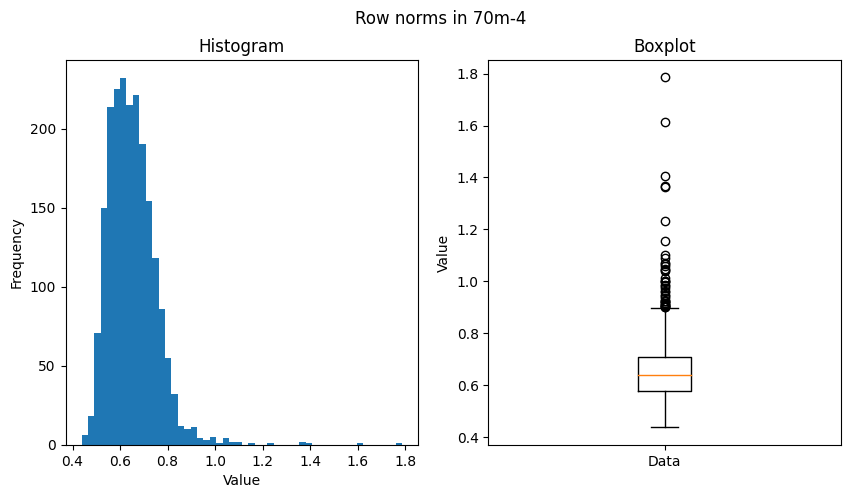

In [ ]:
pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 57.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 6.5 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=dba9ddb415fb0346e6c5d2ce9f8ab402651aaeff22148315d7266bd95b310c1a
  Stored in directory: /root/.cache/pip/wheels/2d/f0/a8/1094fca7a7e5d0d12ff56e0c64675d72aa5cc81a5fc200e849
Successfully built validators


In [ ]:
import os
import zipfile

def create_zip_archive(input_dir, output_path):
    with zipfile.ZipFile(output_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, _, files in os.walk(input_dir):
            for file in files:
                file_path = os.path.join(root, file)
                zipf.write(file_path, os.path.relpath(file_path, input_dir))


In [ ]:

create_zip_archive('/content/plots', '/content/plots1.zip')